# **Table of Contents**

- *1. Introduction of Project*
    - 1.1 Description
    - 1.2 Data filed
- *2. Index*
    - 2.1 Step1. Data Load & preprocessing
    - 2.2 Step2. EDA
    - 2.3 Step3. Modeling 
    - 2.4 Step4. Modeling
    - 2.5 Step
- *3. Issue*
    - 3.1 모집단 특성
        - 패널데이터로 노후 데이터 다수 포함
    - 3.2 데이터 특성
        - 설문조사 데이터로 결측치가 많고, 주관식 급여항목이 대략적으로 작성됨
    - 3.2 조사 항목
        - 급여와 가장 관련이 높을 것으로 예정되는 경력항목 없음
        - 휴직 등과 관련된 항목 없음
- *4. Step1. Data Load & preprocessing*

## **선형회귀 프로젝트: 여성인력의 임금 예측**

## Description
- fast campus 데이터 사이언스 스쿨의 선형회귀 프로젝트
- 여성가족 패널데이터를 활용하여 여성인력의 다양한 feature로 월 급여를 예측해보는 프로젝트
- 데이터 출처: 여성가족 패널 데이터 서비스 (https://klowf.kwdi.re.kr/)
- 진행 기간: 2020. 08. 04. ~ 2020. 08. 31.
- 팀 구성원: 전진경, 최은비

## Data field
- case: 조사회차
- ID : 패널 ID
- fa_job : 15세 무렵 아버지의 직업
- fa_edu : 15세 무렵 아버지의 교육 수준
- life_15 : 15세 무렵 가정 환경
- fama_rel_15 : 15세 무렵 부모님의 관계
- age : 연령
- edu : 교육수준
- marry_YN : 결혼여부
- JOBSAL : 월 급여
- jung_bi : 정규직 여부
- level : 회사 내 직급
- j_type : 회사 유형 (대기업, 외국계, 공공기관 등)
- job_pp : 조직 내 인원

# *Index*

## Step1. Data Load & preprocessing

In [3]:
# 필요 module import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly_express as px
import matplotlib.pyplot as plt

In [4]:
# 데이터 load 및 컬럼 재설정 
data = pd.read_csv('./data/data_1ver.200812.csv', sep=',', encoding = 'euc-kr')
data.columns = ['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age',
       'edu', 'marry_YN', 'JOBSAL']
data_1 = data.copy()
data_1 = data_1[1:]
data_1.tail()

case       ID fa_job fa_edu life_15 fama_rel_15 age edu marry_YN JOBSAL
25312    7  6204402      7      3       3           3  51   7        1    180
25313    6  6204502      6      2       3           2  41   4        1    150
25314    7  6204502      6      2       3           2  43   4        1    170
25315    6  6204901      6      2       3           2  61   2        1     60
25316    7  6204901      6      2       3           2  63   2        1     60

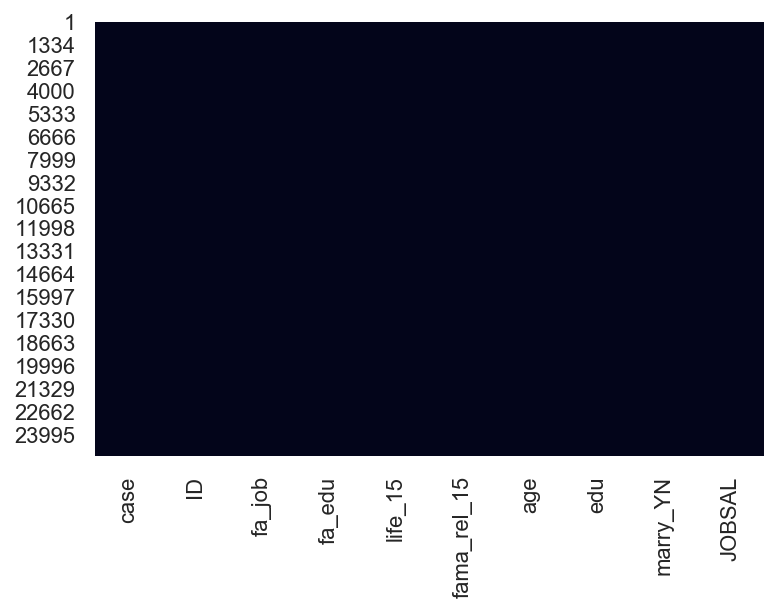

In [6]:
sns.heatmap(data_1.isnull(), cbar=False);

In [7]:
# 데이터 타입 int로 변경
data_1 = data_1.astype("int")

In [8]:
# -8, -9의 경우 무응답
data_1[data_1["fa_job"] <= 0]["fa_job"].value_counts()

-9    53
-8     4
Name: fa_job, dtype: int64

In [9]:
# 아버지 직업 거절/무응답자 57명 0으로 변경 (무응답의 경우 -8 또는 -9의 값)
data_1["fa_job"] = data_1["fa_job"].replace(-8,0).replace(-9,0)

In [10]:
data_1["fa_job"].value_counts()

6     10568
3      2440
7      2347
5      2279
12     1833
4      1259
9      1205
1      1078
2      1033
8       599
11      403
10      215
0        57
Name: fa_job, dtype: int64

In [11]:
data_1[data_1["fa_edu"] <= 0]["fa_edu"].value_counts()

 0    1491
-9      75
-8       4
Name: fa_edu, dtype: int64

In [12]:
data_1[data_1["life_15"] <= 0]["life_15"].value_counts()

-9    12
Name: life_15, dtype: int64

In [13]:
data_1[data_1["fama_rel_15"] <= 0]["fama_rel_15"].value_counts()

-9    55
Name: fama_rel_15, dtype: int64

In [14]:
data_1[data_1["edu"] <= 0]["edu"].value_counts()

-9    10
Name: edu, dtype: int64

In [15]:
# 월급의 분포 확인하기 
fig = px.histogram(data_1, x='JOBSAL')
fig.show()

In [16]:
data_1["JOBSAL"].describe()

count    25316.000000
mean       156.508058
std        110.497297
min         10.000000
25%         90.000000
50%        140.000000
75%        200.000000
max       5000.000000
Name: JOBSAL, dtype: float64

In [17]:
# 이상치 -> 월급 5000 삭제
data_1[data_1['JOBSAL'] == 5000]

case      ID  fa_job  fa_edu  life_15  fama_rel_15  age  edu  marry_YN  \
11265     1  436601       6       1        1            2   55    7         1   

       JOBSAL  
11265    5000

In [18]:
data_1.drop(index=11265, inplace=True)

In [19]:
# 특징별 종속변수(월급) 관계 시각화

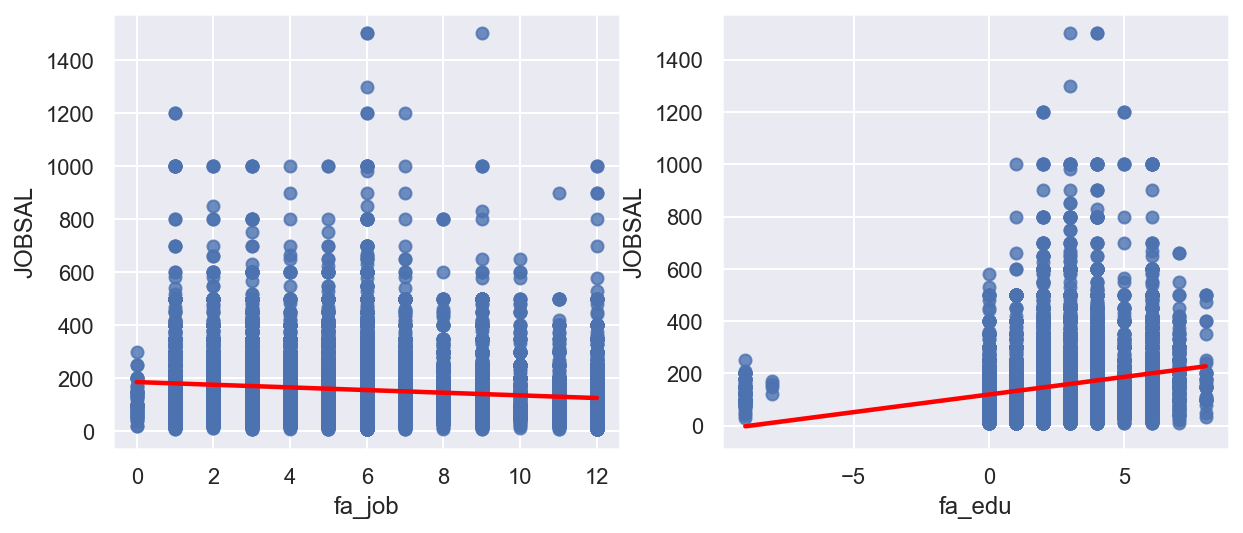

In [20]:
# 아버지 직업, 아버지 교육정도 : 월급
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.regplot(x="fa_job", y='JOBSAL', data=data_1, line_kws={'color':'red'})
plt.subplot(122)
sns.regplot(x="fa_edu", y='JOBSAL', data=data_1, line_kws={'color':'red'})

plt.show()

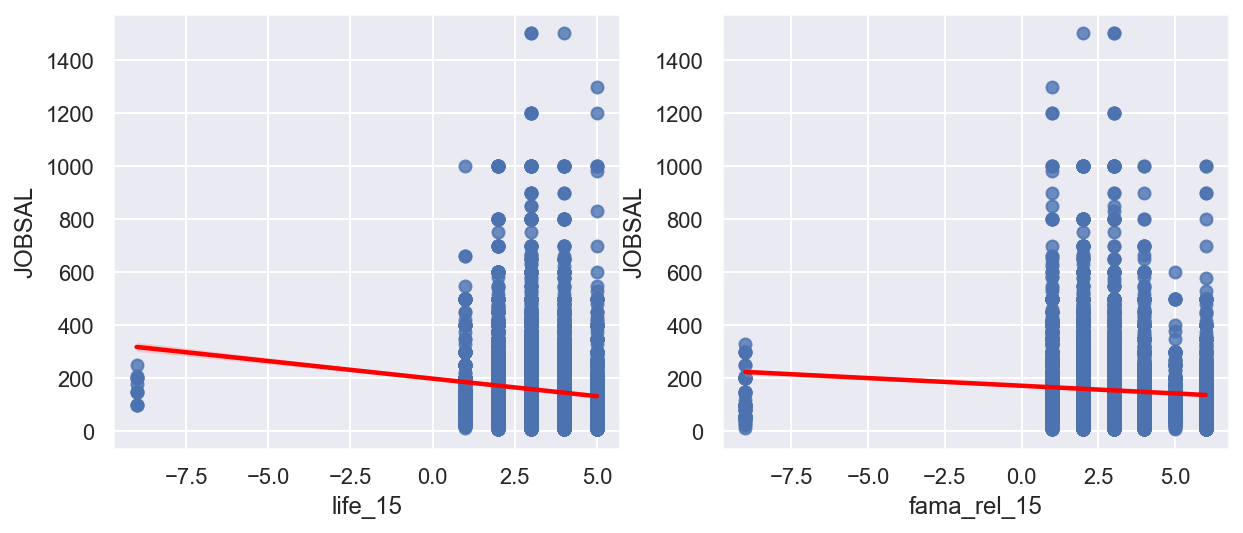

In [21]:
# 15세 생활정도, 15세 부모님관계 : 월급
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.regplot(x="life_15", y='JOBSAL', data=data_1, line_kws={'color':'red'})
plt.subplot(122)
sns.regplot(x="fama_rel_15", y='JOBSAL', data=data_1, line_kws={'color':'red'})

plt.show()

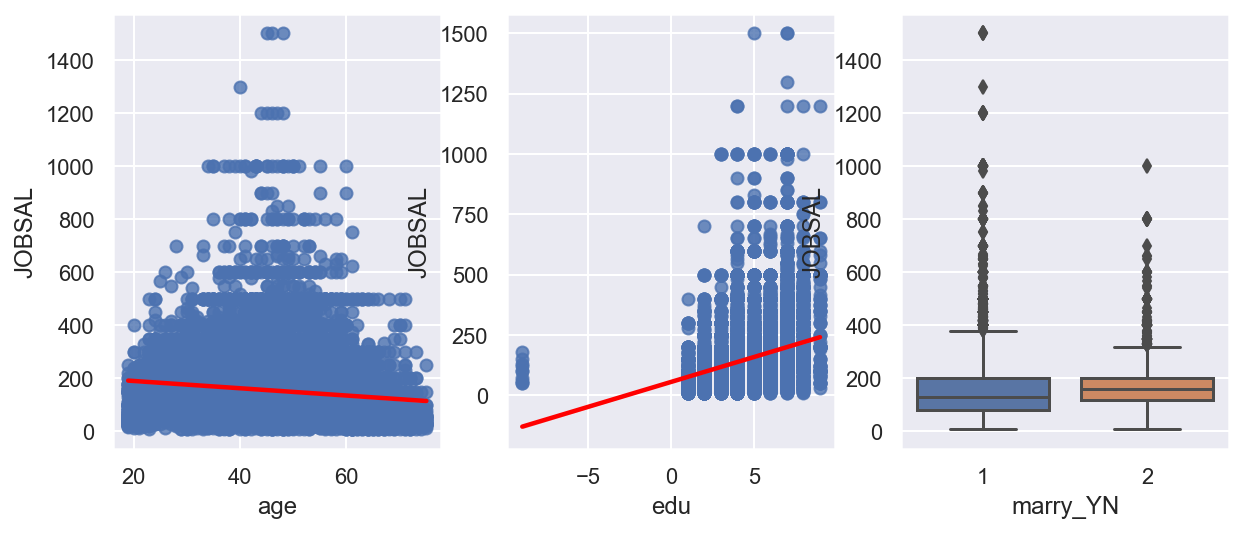

In [22]:
# 나이, 학력, 결혼유무 : 월급
plt.figure(figsize=(10, 4))
plt.subplot(131)
sns.regplot(x="age", y='JOBSAL', data=data_1, line_kws={'color':'red'})
plt.subplot(132)
sns.regplot(x="edu", y='JOBSAL', data=data_1, line_kws={'color':'red'})
plt.subplot(133)
sns.boxplot(x="marry_YN", y='JOBSAL', data=data_1)


plt.show()

In [23]:
# OLS 로 R, coef, p 값 확인
X = data_1[data_1.columns.drop(['JOBSAL', 'case', 'ID'])]
y = data_1["JOBSAL"]

In [24]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [25]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              9615.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):                        0.00
Time:                        16:38:30   Log-Likelihood:                     -1.5219e+05
No. Observations:               25315   AIC:                                  3.044e+05
Df Residuals:                   25308   BIC:                                  3.045e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [26]:
# 아빠직업(6: 농림어업 숙련 종사자), 아빠교육정도(3: 중학교), 
# 15세 생활정도(2: 대체로 잘 사는 편이었다), 15세 부모님관계(1: 아주 좋은 편이었다)
# 나이(37세), 학력(7: 4년제 대학), 결혼여부(1: 있다)
results.predict([[6, 3, 2, 1, 37, 7, 1]])

array([199.31650941])

### 회귀 프로젝트 진행 가능하다고 판단 !! 

# Step1. Data load & preprocessing
- 1.1. 데이터 읽어오기
- 1-2. 결측치 제거
- 1-3. 노후데이터 제거
- 1-4. 경력 컬럼 생성
- 1-5. 범주형 데이터 변환

### 1-1. 데이터 읽어오기

In [27]:
# 필요 module import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly_express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
data = pd.read_csv('./data/데이터_초안_0812.csv', sep=',', encoding = 'euc-kr')
data
# 조사회차	패널ID	15세 아버지 직업	아버지 최종학력	15세 가정 형편	15세 부모님 관계	연령	학력	
# 결혼경험	고등학교 종류	대학전공	대학소재지	일자리구분(정규/비정규)	직위	직장종류	사업체 직원 수	
# 월 급여	첫 직장입직	첫 직장 퇴직	첫직장 유지	새로운 일자리 입직	하던일 퇴직	최근 일자리 그만둔 시점	
# 이전일자리 입직	이전일자리 퇴직

data.columns = ['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu', 
                'marry_YN','hschool','univ_mjor', 'univ_area', 'jung_bi', 'level', 'j_type', 'job_pp', 
                'JOBSAL', 'job_1_in', 'job_1_out', 'job_1_keep', 'njob_in', 'njob_out', 'rjob_out', 
                'pjob_in', 'pjob_out']
data_1 = data.copy()
data_1 = data_1[2:]
data_1.tail()

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.



case       ID fa_job fa_edu life_15 fama_rel_15 age edu marry_YN  \
62423    6  6204702      6      1       3           2  59   4        1   
62424    7  6204702      6      1       3           2  61   4        1   
62425    6  6204802      6      2       4           2  53   4        1   
62426    6  6204901      6      2       3           2  61   2        1   
62427    7  6204901      6      2       3           2  63   2        1   

      hschool  ... job_pp JOBSAL job_1_in job_1_out job_1_keep njob_in  \
62423       3  ...    NaN      0     1976      1978          2     NaN   
62424     NaN  ...    NaN      0      NaN       NaN        NaN     NaN   
62425       3  ...    NaN      0     1984       NaN          1     NaN   
62426     NaN  ...    NaN     60     1977       NaN          1    1978   
62427     NaN  ...    NaN     60      NaN       NaN        NaN     NaN   

      njob_out rjob_out pjob_in pjob_out  
62423      NaN      NaN     NaN      NaN  
62424      NaN      NaN     NaN      NaN  
62425      NaN      NaN     NaN      NaN  
62426      NaN      NaN     NaN      NaN  
62427      NaN      NaN     NaN      NaN  

[5 rows x 25 columns]

### 1-2. 결측치 제거

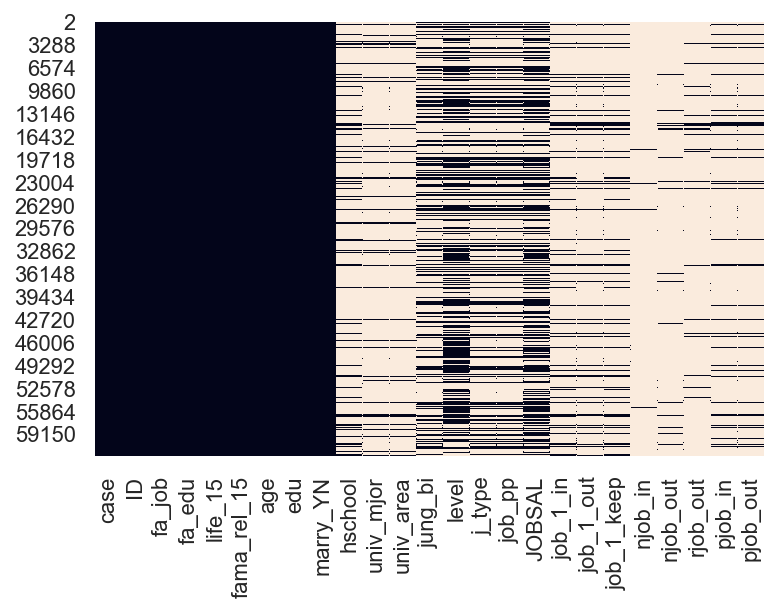

In [29]:
# 종속변수인 월급 ['JOBSAL'] 결측치 제거
sns.heatmap(data_1.isnull(), cbar=False);

In [30]:
# 'JOBSAL' 결측치 수 확인
data_1['JOBSAL'].isnull().value_counts()

True     33029
False    29397
Name: JOBSAL, dtype: int64

In [31]:
# 'JOBSAL' 컬럼 결측치 제거
data_1.drop(data_1[data_1['JOBSAL'].isnull()].index, inplace=True)

In [32]:
# 'JOBSAL'이 0인 경우도 모두 결측치로 간주하여 제거
data_1[data_1['JOBSAL'] == 0]['JOBSAL'].value_counts()

0.0    2942
Name: JOBSAL, dtype: int64

In [33]:
data_1.drop(data_1[data_1['JOBSAL'] == 0].index, inplace=True)

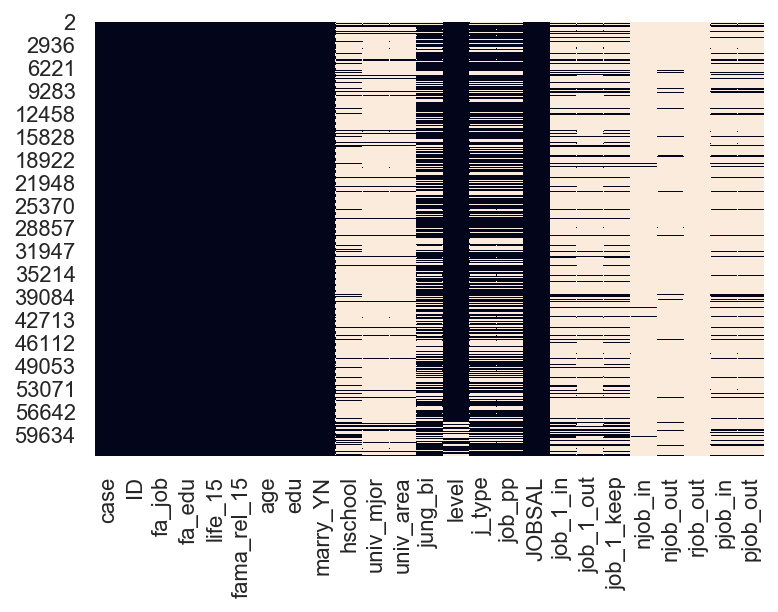

In [35]:
# JOBSAL에서 결측치 제거 완료
sns.heatmap(data_1.isnull(), cbar=False);

In [36]:
data_1 = data_1.replace('', np.nan)
data_1 = data_1.astype("float")
data_1.reset_index(inplace=True, drop=True)
data_1.tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
26450   7.0  6204402.0     7.0     3.0      3.0          3.0  51.0  7.0   
26451   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   
26452   7.0  6204502.0     6.0     2.0      3.0          2.0  43.0  4.0   
26453   6.0  6204901.0     6.0     2.0      3.0          2.0  61.0  2.0   
26454   7.0  6204901.0     6.0     2.0      3.0          2.0  63.0  2.0   

       marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  \
26450       1.0      NaN  ...     4.0   180.0       NaN        NaN   
26451       1.0      3.0  ...     3.0   150.0    1993.0     2014.0   
26452       1.0      NaN  ...     4.0   170.0       NaN        NaN   
26453       1.0      NaN  ...     NaN    60.0    1977.0        NaN   
26454       1.0      NaN  ...     NaN    60.0       NaN        NaN   

       job_1_keep  njob_in  njob_out  rjob_out  pjob_in  pjob_out  
26450         NaN      NaN       NaN       NaN      NaN       NaN  
26451         2.0      NaN       NaN       NaN      NaN       NaN  
26452         NaN      NaN       NaN       NaN      NaN       NaN  
26453         1.0   1978.0       NaN       NaN      NaN       NaN  
26454         NaN      NaN       NaN       NaN      NaN       NaN  

[5 rows x 25 columns]

In [37]:
# 아빠직업, 교육, 가정환경, 관계 에서 음수는 0으로 처리
# 나이, 교육수준, 결혼여부, 급여 에서 음수는 행데이터 drop
# 대학전공, 고용형태, 직장지위, 회사형태, 회사인원, 첫직장입직에서 음수는 0으로 처리
print('아빠직업:', data_1[data_1["fa_job"] <= 0]["fa_job"].value_counts())
print('아빠교육:', data_1[data_1["fa_edu"] <= 0]["fa_edu"].value_counts())
print('가정환경:', data_1[data_1["life_15"] <= 0]["life_15"].value_counts())
print('엄빠관계:', data_1[data_1["fama_rel_15"] <= 0]["fama_rel_15"].value_counts())
print('나이:', data_1[data_1["age"] <= 0]["age"].value_counts())
print('교육수준:', data_1[data_1["edu"] <= 0]["edu"].value_counts())
print('결혼여부:', data_1[data_1["marry_YN"] <= 0]["marry_YN"].value_counts())
print('고등학교:', data_1[data_1["hschool"] <= 0]["hschool"].value_counts())
print('대학전공:', data_1[data_1["univ_area"] <= 0]["univ_area"].value_counts())
print('고용형태:', data_1[data_1["jung_bi"] <= 0]["jung_bi"].value_counts())
print('직장지위:', data_1[data_1["level"] <= 0]["level"].value_counts())
print('회사형태:', data_1[data_1["j_type"] <= 0]["j_type"].value_counts())
print('회사인원:', data_1[data_1["job_pp"] <= 0]["job_pp"].value_counts())
print('첫직장입직:', data_1[data_1["job_1_in"] <= 0]["job_1_in"].value_counts())
print('급여:', data_1[data_1["JOBSAL"] <= 0]["JOBSAL"].value_counts())

아빠직업: -9.0    53
-8.0     4
Name: fa_job, dtype: int64
아빠교육:  0.0    1562
-9.0      79
-8.0       4
Name: fa_edu, dtype: int64
가정환경: -9.0    14
Name: life_15, dtype: int64
엄빠관계: -9.0    61
Name: fama_rel_15, dtype: int64
나이: Series([], Name: age, dtype: int64)
교육수준: -9.0    10
Name: edu, dtype: int64
결혼여부: Series([], Name: marry_YN, dtype: int64)
고등학교: -9.0    9
-8.0    1
Name: hschool, dtype: int64
대학전공: -9.0    14
-8.0     1
Name: univ_area, dtype: int64
고용형태: -9.0    17
Name: jung_bi, dtype: int64
직장지위: Series([], Name: level, dtype: int64)
회사형태: -9.0    17
-8.0     3
Name: j_type, dtype: int64
회사인원: -9.0    64
-8.0     4
Name: job_pp, dtype: int64
첫직장입직: -9.0    16
Name: job_1_in, dtype: int64
급여:  0.0    742
-9.0    223
-8.0    122
Name: JOBSAL, dtype: int64


- 나이, 결혼여부는 음수 없음
- 교육수준, 고등학교, 대학전공, 대학 지역에서 음수는 인덱스 삭제
- 회사형태, 회사 인원 에서 음수는 0으로 대체

In [38]:
data_1['fa_job'] = data_1['fa_job'].replace(-9,0).replace(-8,0)
data_1['fa_edu'] = data_1['fa_edu'].replace(-9,0).replace(-8,0)
data_1['life_15'] = data_1['life_15'].replace(-9,0).replace(-8,0)
data_1['fama_rel_15'] = data_1['fama_rel_15'].replace(-9,0).replace(-8,0)
data_1['jung_bi'] = data_1['jung_bi'].replace(-9,0).replace(-8,0)
data_1['level'] = data_1['level'].replace(-9,0).replace(-8,0)
data_1['j_type'] = data_1['j_type'].replace(-9,0).replace(-8,0)
data_1['job_pp'] = data_1['job_pp'].replace(-9,0).replace(-8,0)

In [39]:
data_1 = data_1[data_1['edu'] >= -1]
data_1 = data_1[data_1['hschool'] >= -1]
data_1 = data_1[data_1['univ_mjor'] >= -1]
data_1 = data_1[data_1['univ_area'] >= -1]

In [40]:
data_1.reset_index(drop=True, inplace=True)
data_1.tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
2126   6.0  6201002.0    12.0     0.0      2.0          6.0  36.0  7.0   
2127   6.0  6202902.0     7.0     3.0      4.0          3.0  24.0  7.0   
2128   6.0  6203101.0     6.0     2.0      3.0          3.0  48.0  6.0   
2129   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   
2130   6.0  6204402.0     7.0     3.0      3.0          3.0  49.0  7.0   

      marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  job_1_keep  \
2126       1.0      1.0  ...     5.0   250.0    2003.0     2004.0         2.0   
2127       2.0      2.0  ...     4.0   160.0    2016.0        NaN         1.0   
2128       1.0      1.0  ...     3.0   200.0    1988.0        NaN         1.0   
2129       2.0      1.0  ...     3.0   250.0    2011.0     2014.0         2.0   
2130       1.0      1.0  ...     4.0   100.0    1989.0     1994.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  
2126      NaN    2008.0       NaN   2006.0    2008.0  
2127      NaN       NaN       NaN      NaN       NaN  
2128      NaN       NaN       NaN      NaN       NaN  
2129      NaN       NaN       NaN   2011.0    2014.0  
2130      NaN    1994.0       NaN   1989.0    1995.0  

[5 rows x 25 columns]

### 1-3. 노후데이터 제거

In [41]:
# 첫 직장 입직년도를 1990년도 이후로 선별
data_1_1990 = data_1[data_1['job_1_in']>=1990]
data_1_1990.reset_index(drop=True)

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
0      1.0      802.0     3.0     4.0      3.0          3.0  33.0  7.0   
1      1.0     1002.0     5.0     4.0      3.0          2.0  33.0  7.0   
2      1.0     1702.0     5.0     4.0      3.0          2.0  32.0  6.0   
3      6.0     1904.0     7.0     4.0      4.0          3.0  33.0  7.0   
4      1.0     2803.0     8.0     4.0      4.0          3.0  33.0  6.0   
...    ...        ...     ...     ...      ...          ...   ...  ...   
1691   6.0  6200203.0     8.0     6.0      3.0          3.0  23.0  7.0   
1692   6.0  6200602.0     7.0     4.0      3.0          3.0  47.0  7.0   
1693   6.0  6201002.0    12.0     0.0      2.0          6.0  36.0  7.0   
1694   6.0  6202902.0     7.0     3.0      4.0          3.0  24.0  7.0   
1695   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   

      marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  job_1_keep  \
0          1.0      1.0  ...     4.0   167.0    1995.0     1997.0         2.0   
1          1.0      1.0  ...     NaN   200.0    1997.0     1999.0         2.0   
2          1.0      1.0  ...     4.0   180.0    1997.0     2007.0         1.0   
3          1.0      1.0  ...     5.0   300.0    2007.0     2012.0         2.0   
4          2.0      3.0  ...     3.0   120.0    2001.0     2002.0         2.0   
...        ...      ...  ...     ...     ...       ...        ...         ...   
1691       2.0      2.0  ...     3.0   150.0    2016.0        NaN         1.0   
1692       1.0      1.0  ...     2.0   200.0    1992.0     1994.0         2.0   
1693       1.0      1.0  ...     5.0   250.0    2003.0     2004.0         2.0   
1694       2.0      2.0  ...     4.0   160.0    2016.0        NaN         1.0   
1695       2.0      1.0  ...     3.0   250.0    2011.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  
0         NaN       NaN       NaN   1998.0    1999.0  
1         NaN       NaN       NaN   1997.0    1999.0  
2         NaN       NaN       NaN      NaN       NaN  
3         NaN       NaN       NaN   2007.0    2012.0  
4         NaN       NaN       NaN   2000.0    2005.0  
...       ...       ...       ...      ...       ...  
1691      NaN       NaN       NaN      NaN       NaN  
1692      NaN    1994.0       NaN   1992.0    1994.0  
1693      NaN    2008.0       NaN   2006.0    2008.0  
1694      NaN       NaN       NaN      NaN       NaN  
1695      NaN       NaN       NaN   2011.0    2014.0  

[1696 rows x 25 columns]

In [42]:
# 나이를 60세 이하로 선별
data_1_1990_age = data_1_1990[data_1_1990['age'] <= 60]
data_1_1990_age.reset_index(drop=True)

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
0      1.0      802.0     3.0     4.0      3.0          3.0  33.0  7.0   
1      1.0     1002.0     5.0     4.0      3.0          2.0  33.0  7.0   
2      1.0     1702.0     5.0     4.0      3.0          2.0  32.0  6.0   
3      6.0     1904.0     7.0     4.0      4.0          3.0  33.0  7.0   
4      1.0     2803.0     8.0     4.0      4.0          3.0  33.0  6.0   
...    ...        ...     ...     ...      ...          ...   ...  ...   
1689   6.0  6200203.0     8.0     6.0      3.0          3.0  23.0  7.0   
1690   6.0  6200602.0     7.0     4.0      3.0          3.0  47.0  7.0   
1691   6.0  6201002.0    12.0     0.0      2.0          6.0  36.0  7.0   
1692   6.0  6202902.0     7.0     3.0      4.0          3.0  24.0  7.0   
1693   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   

      marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  job_1_keep  \
0          1.0      1.0  ...     4.0   167.0    1995.0     1997.0         2.0   
1          1.0      1.0  ...     NaN   200.0    1997.0     1999.0         2.0   
2          1.0      1.0  ...     4.0   180.0    1997.0     2007.0         1.0   
3          1.0      1.0  ...     5.0   300.0    2007.0     2012.0         2.0   
4          2.0      3.0  ...     3.0   120.0    2001.0     2002.0         2.0   
...        ...      ...  ...     ...     ...       ...        ...         ...   
1689       2.0      2.0  ...     3.0   150.0    2016.0        NaN         1.0   
1690       1.0      1.0  ...     2.0   200.0    1992.0     1994.0         2.0   
1691       1.0      1.0  ...     5.0   250.0    2003.0     2004.0         2.0   
1692       2.0      2.0  ...     4.0   160.0    2016.0        NaN         1.0   
1693       2.0      1.0  ...     3.0   250.0    2011.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  
0         NaN       NaN       NaN   1998.0    1999.0  
1         NaN       NaN       NaN   1997.0    1999.0  
2         NaN       NaN       NaN      NaN       NaN  
3         NaN       NaN       NaN   2007.0    2012.0  
4         NaN       NaN       NaN   2000.0    2005.0  
...       ...       ...       ...      ...       ...  
1689      NaN       NaN       NaN      NaN       NaN  
1690      NaN    1994.0       NaN   1992.0    1994.0  
1691      NaN    2008.0       NaN   2006.0    2008.0  
1692      NaN       NaN       NaN      NaN       NaN  
1693      NaN       NaN       NaN   2011.0    2014.0  

[1694 rows x 25 columns]

### 1-4. 경력컬럼 생성

> 월급에 있어서 경력은 매우 중요한 요소라고 생각 -> 경력 컬럼 추가!
- **정확한 경력은 알 수없어 임의로 계산하기로 결정함**

첫직장 입직/퇴직/유지여부, 이전직장 입직/퇴직 컬럼 추가함
- 각 시점이 없는 데이터가 많았음. 
    1. 각 입직 시점이 없는 경우 -> drop : 계산 불가능
    2. 첫직장 퇴직시점이 없는경우
        - 첫직장 유지 O -> 마지막 조사 차수 시기로 대체 
        - 첫직장 유지 X -> 이전직장 퇴직 시점으로 대체 
    3. 이전직장 퇴직시점이 없는 경우 -> 임의로 마지막 조사한 차수의 시기로 채워넣기로 함  

In [43]:
# 첫직장 퇴직시점에 na값이 1245개 발견
data_1_1990_age = data_1_1990_age.fillna(0)
np.unique(data_1_1990_age['job_1_out'], return_counts=True)

(array([  -9.,    0., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016., 2018.]),
 array([  7, 852,   3,   9,  13,  31,  44,  46,  44,  40,  43,  54,  42,
         51,  51,  54,  54,  54,  49,  43,  21,  11,  13,  11,  12,  14,
         13,   7,   7,   1], dtype=int64))

In [44]:
# 첫 직장 유지여부 확인하여 첫직장 퇴직연도 넣어주기
data_1_1990_age['job_1_out_2'] = np.where(data_1_1990_age['job_1_keep'] == 1, data_1_1990_age['case'],
                                          (np.where( data_1_1990_age['job_1_out'] != 0 , data_1_1990_age['job_1_out'],
                                                   data_1_1990_age['pjob_out'])))

In [45]:
# 첫직장 유지할 경우 마지막 조사차수를 퇴직년도로 넣기
data_1_1990_age['job_1_out_2'] = data_1_1990_age['job_1_out_2']\
.replace(1, 2007).replace(2, 2008).replace(3, 2010).replace(4, 2012)\
.replace(5, 2014).replace(6, 2016).replace(7, 2018)

data_1_1990_age.reset_index(drop=True).tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
1689   6.0  6200203.0     8.0     6.0      3.0          3.0  23.0  7.0   
1690   6.0  6200602.0     7.0     4.0      3.0          3.0  47.0  7.0   
1691   6.0  6201002.0    12.0     0.0      2.0          6.0  36.0  7.0   
1692   6.0  6202902.0     7.0     3.0      4.0          3.0  24.0  7.0   
1693   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   

      marry_YN  hschool  ...  JOBSAL  job_1_in  job_1_out  job_1_keep  \
1689       2.0      2.0  ...   150.0    2016.0        0.0         1.0   
1690       1.0      1.0  ...   200.0    1992.0     1994.0         2.0   
1691       1.0      1.0  ...   250.0    2003.0     2004.0         2.0   
1692       2.0      2.0  ...   160.0    2016.0        0.0         1.0   
1693       2.0      1.0  ...   250.0    2011.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  job_1_out_2  
1689      0.0       0.0       0.0      0.0       0.0       2016.0  
1690      0.0    1994.0       0.0   1992.0    1994.0       1994.0  
1691      0.0    2008.0       0.0   2006.0    2008.0       2004.0  
1692      0.0       0.0       0.0      0.0       0.0       2016.0  
1693      0.0       0.0       0.0   2011.0    2014.0       2014.0  

[5 rows x 26 columns]

In [46]:
# 패널별 마지막 조사차수로 정렬
ata_1_1990_age = data_1_1990_age.groupby("ID").max()
data_1_1990_age.reset_index(drop=True).tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
1689   6.0  6200203.0     8.0     6.0      3.0          3.0  23.0  7.0   
1690   6.0  6200602.0     7.0     4.0      3.0          3.0  47.0  7.0   
1691   6.0  6201002.0    12.0     0.0      2.0          6.0  36.0  7.0   
1692   6.0  6202902.0     7.0     3.0      4.0          3.0  24.0  7.0   
1693   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   

      marry_YN  hschool  ...  JOBSAL  job_1_in  job_1_out  job_1_keep  \
1689       2.0      2.0  ...   150.0    2016.0        0.0         1.0   
1690       1.0      1.0  ...   200.0    1992.0     1994.0         2.0   
1691       1.0      1.0  ...   250.0    2003.0     2004.0         2.0   
1692       2.0      2.0  ...   160.0    2016.0        0.0         1.0   
1693       2.0      1.0  ...   250.0    2011.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  job_1_out_2  
1689      0.0       0.0       0.0      0.0       0.0       2016.0  
1690      0.0    1994.0       0.0   1992.0    1994.0       1994.0  
1691      0.0    2008.0       0.0   2006.0    2008.0       2004.0  
1692      0.0       0.0       0.0      0.0       0.0       2016.0  
1693      0.0       0.0       0.0   2011.0    2014.0       2014.0  

[5 rows x 26 columns]

In [47]:
# 기존 첫직장 퇴직 컬럼 삭제
data_1_1990_age= data_1_1990_age.drop("job_1_out", axis=1) 

In [48]:
data_1_1990_age.columns

Index(['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age',
       'edu', 'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi',
       'level', 'j_type', 'job_pp', 'JOBSAL', 'job_1_in', 'job_1_keep',
       'njob_in', 'njob_out', 'rjob_out', 'pjob_in', 'pjob_out',
       'job_1_out_2'],
      dtype='object')

In [49]:
# 컬럼 위치 재정비
data_1_1990_age = data_1_1990_age[['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'job_1_out_2', 'job_1_keep', 'njob_in',
       'njob_out', 'rjob_out', 'pjob_in', 'pjob_out', 'JOBSAL',]]

In [50]:
# 첫직장 퇴직년도 입력 확인
np.unique(data_1_1990_age['job_1_out_2'], return_counts = True)

(array([  -9., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
        1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
        2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
        2016., 2018.]),
 array([  7,   3,   9,  13,  31,  44,  46,  44,  40,  43,  54,  42,  51,
         51,  54,  54,  54,  49, 443,  65,  11,  73,  11,  51,  14,  40,
          7, 250,  40], dtype=int64))

In [51]:
# 경력 컬럼 추가 -> working_y
data_1_1990_age['working_y']=" "
data_1_1990_age.reset_index(drop=True).tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
1689   6.0     8.0     6.0      3.0          3.0  23.0  7.0       2.0   
1690   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
1691   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
1692   6.0     7.0     3.0      4.0          3.0  24.0  7.0       2.0   
1693   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  \
1689      2.0        3.0  ...    2016.0       2016.0         1.0      0.0   
1690      1.0        6.0  ...    1992.0       1994.0         2.0      0.0   
1691      1.0       10.0  ...    2003.0       2004.0         2.0      0.0   
1692      2.0        9.0  ...    2016.0       2016.0         1.0      0.0   
1693      1.0       12.0  ...    2011.0       2014.0         2.0      0.0   

      njob_out  rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
1689       0.0       0.0      0.0       0.0   150.0             
1690    1994.0       0.0   1992.0    1994.0   200.0             
1691    2008.0       0.0   2006.0    2008.0   250.0             
1692       0.0       0.0      0.0       0.0   160.0             
1693       0.0       0.0   2011.0    2014.0   250.0             

[5 rows x 25 columns]

In [52]:
# 첫직장을 유지하지 않은 사람들의 퇴직년도가 입력되지않아서 분류해서 추가 
keep1 = data_1_1990_age[data_1_1990_age['job_1_keep']==1]
keep2 = data_1_1990_age[data_1_1990_age['job_1_keep']==2]

In [53]:
# 행별 계산이 가능한지 test
keep1['working_y'].values[1] = keep1['job_1_out_2'].values[1] - keep1['job_1_in'].values[1]
keep1.head()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  hschool  \
4    1.0     5.0     4.0      3.0          2.0  32.0  6.0       1.0      1.0   
8    3.0     7.0     3.0      4.0          3.0  25.0  7.0       2.0      1.0   
15   3.0     1.0     6.0      2.0          1.0  25.0  7.0       2.0      1.0   
20   3.0     7.0     4.0      3.0          3.0  31.0  7.0       2.0      2.0   
23   1.0     3.0     5.0      3.0          2.0  25.0  7.0       2.0      1.0   

    univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  njob_out  \
4         7.0  ...    1997.0       2007.0         1.0      0.0       0.0   
8         1.0  ...    2010.0       2010.0         1.0      0.0       0.0   
15        3.0  ...    2010.0       2010.0         1.0      0.0       0.0   
20        9.0  ...    2009.0       2010.0         1.0      0.0       0.0   
23        3.0  ...    2005.0       2007.0         1.0      0.0       0.0   

    rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
4        0.0      0.0       0.0   180.0             
8        0.0   2009.0    2010.0   130.0          0  
15       0.0      0.0       0.0   380.0             
20       0.0      0.0       0.0   200.0             
23       0.0      0.0       0.0   200.0             

[5 rows x 25 columns]

In [54]:
# case 1 : 첫직장을 유지
# -> 첫직장 입직/퇴직으로 총 경력계산 가능
for i in range(len(keep1['job_1_out_2'])):
    keep1['working_y'].values[i] = keep1['job_1_out_2'].values[i] - keep1['job_1_in'].values[i]
    i += 1
print("종료", end="\t")

종료	

In [55]:
np.unique(keep1['working_y'], return_counts=True)

(array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
        12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
        23.0, 24.0, 25.0, 26.0], dtype=object),
 array([ 17, 177, 112,  91,  67,  56,  50,  31,  38,  31,  27,  16,  16,
         23,  23,  15,  10,  16,  16,   4,   1,   1,   3,   2,   1,   3,
          1,   5], dtype=int64))

In [56]:
# case 2 : 첫직장을 유지하지 않을 경우
# -> 첫직장 퇴직이 이전직장 퇴직과 같을 경우 -> 이전직장 경력
# -> 첫직장 퇴직이 이전직장 퇴직과 다를 경우 -> 첫직장 입직/퇴직 + 이전직장 입직/퇴직
for i in range(0, len(keep2)-1):
#     keep2['job_1_out_2'].values[i]
    i += 1
    if keep2['job_1_out_2'].values[i] == keep2['pjob_out'].values[i]:
        keep2['working_y'].values[i] = keep2['pjob_out'].values[i] - keep2['job_1_in'].values[i]
    else: 
        keep2['working_y'].values[i] = (keep2['job_1_out_2'].values[i] - keep2['job_1_in'].values[i]) + (keep2['pjob_out'].values[i] - keep2['pjob_in'].values[i])
print("종료", end="\t")

종료	

In [57]:
data_fin = pd.concat([keep1, keep2])
data_fin.reset_index(drop=True).tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
1689   6.0     3.0     4.0      3.0          3.0  36.0  7.0       2.0   
1690   6.0     3.0     4.0      3.0          3.0  41.0  7.0       1.0   
1691   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
1692   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
1693   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  \
1689      1.0       10.0  ...    2005.0       2006.0         2.0      0.0   
1690      1.0        6.0  ...    1995.0       2003.0         2.0      0.0   
1691      1.0        6.0  ...    1992.0       1994.0         2.0      0.0   
1692      1.0       10.0  ...    2003.0       2004.0         2.0      0.0   
1693      1.0       12.0  ...    2011.0       2014.0         2.0      0.0   

      njob_out  rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
1689       0.0       0.0      0.0       0.0   300.0          1  
1690       0.0       0.0      0.0       0.0   140.0          8  
1691    1994.0       0.0   1992.0    1994.0   200.0          2  
1692    2008.0       0.0   2006.0    2008.0   250.0          3  
1693       0.0       0.0   2011.0    2014.0   250.0          3  

[5 rows x 25 columns]

In [58]:
data_fin['working_y'].unique()

array([10.0, 0.0, 1.0, 2.0, 5.0, 9.0, 8.0, 11.0, 15.0, 7.0, 14.0, 3.0,
       4.0, -1.0, 6.0, 17.0, 16.0, 12.0, 13.0, 21.0, 18.0, 22.0, 24.0,
       26.0, 23.0, 25.0, 20.0, 19.0, ' ', -2003.0, -2007.0, -1996.0,
       -1991.0, -1997.0, -2009.0, -2010.0, 31.0], dtype=object)

In [59]:
data_fin['working_y'].replace(' ',"0", inplace=True)
data_fin['working_y'] = data_fin['working_y'].astype('int')
np.unique(data_fin['working_y'], return_counts=True)

(array([-2010, -2009, -2007, -2003, -1997, -1996, -1991,    -1,     0,
            1,     2,     3,     4,     5,     6,     7,     8,     9,
           10,    11,    12,    13,    14,    15,    16,    17,    18,
           19,    20,    21,    22,    23,    24,    25,    26,    31]),
 array([  1,   1,   1,   1,   1,   1,   1,  17, 265, 261, 251, 192, 157,
        111,  65,  73,  49,  42,  30,  25,  28,  31,  17,  14,  17,  16,
          5,   2,   2,   3,   2,   2,   3,   1,   5,   1], dtype=int64))

In [60]:
# 총 5497개에서 42개의 데이터가 음수 & 2000년 이상 나옴 -> drop 결정
a = data_fin[data_fin['working_y']>=2000].index
b = data_fin[data_fin['working_y']<=0].index

In [61]:
data_fin = data_fin.drop(a)
data_fin = data_fin.drop(b)
data_fin.reset_index(drop=True, inplace=True)

In [62]:
data_fin.tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
1400   6.0     3.0     4.0      3.0          3.0  36.0  7.0       2.0   
1401   6.0     3.0     4.0      3.0          3.0  41.0  7.0       1.0   
1402   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
1403   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
1404   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  \
1400      1.0       10.0  ...    2005.0       2006.0         2.0      0.0   
1401      1.0        6.0  ...    1995.0       2003.0         2.0      0.0   
1402      1.0        6.0  ...    1992.0       1994.0         2.0      0.0   
1403      1.0       10.0  ...    2003.0       2004.0         2.0      0.0   
1404      1.0       12.0  ...    2011.0       2014.0         2.0      0.0   

      njob_out  rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
1400       0.0       0.0      0.0       0.0   300.0          1  
1401       0.0       0.0      0.0       0.0   140.0          8  
1402    1994.0       0.0   1992.0    1994.0   200.0          2  
1403    2008.0       0.0   2006.0    2008.0   250.0          3  
1404       0.0       0.0   2011.0    2014.0   250.0          3  

[5 rows x 25 columns]

> 첫직장 퇴직부터 이전직장퇴직까지는 경력 산출 용도로 추출하여 drop함

In [63]:
# drop하여 새로운 변수 생성
data_fin_drop = data_fin.drop(['job_1_out_2', 'job_1_keep', 'njob_in',
                    'njob_out', 'rjob_out', 'pjob_in', 'pjob_out'], axis=1)

In [64]:
data_fin_drop.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'JOBSAL', 'working_y'],
      dtype='object')

In [66]:
# 경력 컬럼 upper fence 확인
np.percentile(data_fin_drop['working_y'], 75), np.percentile(data_fin_drop['working_y'], 25)
np.percentile(data_fin_drop['working_y'], 75)+1.5*(np.percentile(data_fin_drop['working_y'], 75)- np.percentile(data_fin_drop['working_y'], 25))
# upper fence=14.5

14.5

In [67]:
# 경력의 upper fence 14.5년 이하데이터만 남김
data_fin_1 = data_fin_drop[data_fin_drop['working_y'] < 14.5]

### 1-5. 변수 통합 및 생성

In [68]:
# 대졸여부 컬럼 만들기 (edu컬럼 대체)
data_fin_2 = pd.get_dummies(data_fin_1, columns=['edu', 'marry_YN', 
                                                  'univ_area', 'jung_bi'])
data_fin_2['univ_grad'] = 0
data_fin_2['univ_grad'] = data_fin_2['edu_6.0'] + data_fin_2['edu_7.0'] + data_fin_2['edu_8.0'] + data_fin_2['edu_9.0']

In [69]:
data_fin_2.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'hschool',
       'univ_mjor', 'level', 'j_type', 'job_pp', 'job_1_in', 'JOBSAL',
       'working_y', 'edu_6.0', 'edu_7.0', 'edu_8.0', 'edu_9.0', 'marry_YN_1.0',
       'marry_YN_2.0', 'univ_area_1.0', 'univ_area_2.0', 'univ_area_3.0',
       'univ_area_4.0', 'univ_area_5.0', 'univ_area_6.0', 'univ_area_7.0',
       'univ_area_8.0', 'univ_area_9.0', 'univ_area_10.0', 'univ_area_11.0',
       'univ_area_12.0', 'univ_area_13.0', 'univ_area_14.0', 'univ_area_15.0',
       'univ_area_16.0', 'univ_area_18.0', 'jung_bi_0.0', 'jung_bi_1.0',
       'jung_bi_2.0', 'univ_grad'],
      dtype='object')

In [70]:
data_fin_2.drop(['edu_6.0','edu_7.0', 'edu_9.0','edu_8.0'], 
    axis=1, inplace=True)

In [71]:
# 대학지역 서울 여부만 표기하는 것으로 변경
data_fin_2.drop(['univ_area_2.0', 'univ_area_3.0', 'univ_area_3.0', 'univ_area_5.0',
                  'univ_area_6.0', 'univ_area_7.0', 'univ_area_8.0', 'univ_area_9.0', 'univ_area_10.0', 
                  'univ_area_11.0', 'univ_area_12.0', 'univ_area_13.0', 'univ_area_14.0', 
                  'univ_area_15.0', 'univ_area_16.0', 'univ_area_18.0'], axis=1, inplace=True)

In [72]:
data_fin_2.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'hschool',
       'univ_mjor', 'level', 'j_type', 'job_pp', 'job_1_in', 'JOBSAL',
       'working_y', 'marry_YN_1.0', 'marry_YN_2.0', 'univ_area_1.0',
       'univ_area_4.0', 'jung_bi_0.0', 'jung_bi_1.0', 'jung_bi_2.0',
       'univ_grad'],
      dtype='object')

# Step2. EDA
- 개별 변수 확인
- 변수 간 관계 확인

- 범주형 컬럼 총 13개 -> boxplot으로 확인(음수데이터 여부)
- 수치형 컬럼 총 2개 -> regplot으로 확인(선형성 여부)

### 2-1. 개별 변수 확인

In [73]:
# 20대 미만 : 13명
print(len(data_fin_1[(data_fin_1['age']>=10) & (data_fin_1['age']<20)])/1877 * 100)
# 20대 ~ 30대 : 694명
print(len(data_fin_1[(data_fin_1['age']>=20) & (data_fin_1['age']<30)])/1877*100)
# 30대 ~ 40대 : 795명
print(len(data_fin_1[(data_fin_1['age']>=30) & (data_fin_1['age']<40)])/1877*100)
# 40대 ~ 50대 : 247명
print(len(data_fin_1[(data_fin_1['age']>=40) & (data_fin_1['age']<50)])/1877*100)
# 50대 ~ 60대 : 119명
print(len(data_fin_1[(data_fin_1['age']>=50) & (data_fin_1['age']<60)])/1877*100)
# 60대 : 9명
print(len(data_fin_1[(data_fin_1['age']>=60)])/1877*100)

0.42621204049014383
30.420884389984014
32.81832711774108
6.553010122535961
0.7458710708577517
0.0


In [74]:
age_pd = pd.DataFrame({"구분": ['20대 미만', '20대', '30대', '40대', '50대', '60대'],
              "인원":[13, 694, 795, 247, 119, 9]})
age_pd

구분   인원
0  20대 미만   13
1     20대  694
2     30대  795
3     40대  247
4     50대  119
5     60대    9

In [75]:
data_fin_1['age'].describe()

count    1332.000000
mean       31.441441
std         6.378874
min        19.000000
25%        26.000000
50%        31.000000
75%        36.000000
max        58.000000
Name: age, dtype: float64

In [76]:
data_fin_1['JOBSAL'].describe()

count    1332.000000
mean      169.353979
std       106.314525
min        -9.000000
25%       100.000000
50%       150.000000
75%       200.000000
max      1500.000000
Name: JOBSAL, dtype: float64

In [77]:
data_fin_1['working_y'].describe()

count    1332.000000
mean        4.313063
std         3.310214
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        14.000000
Name: working_y, dtype: float64

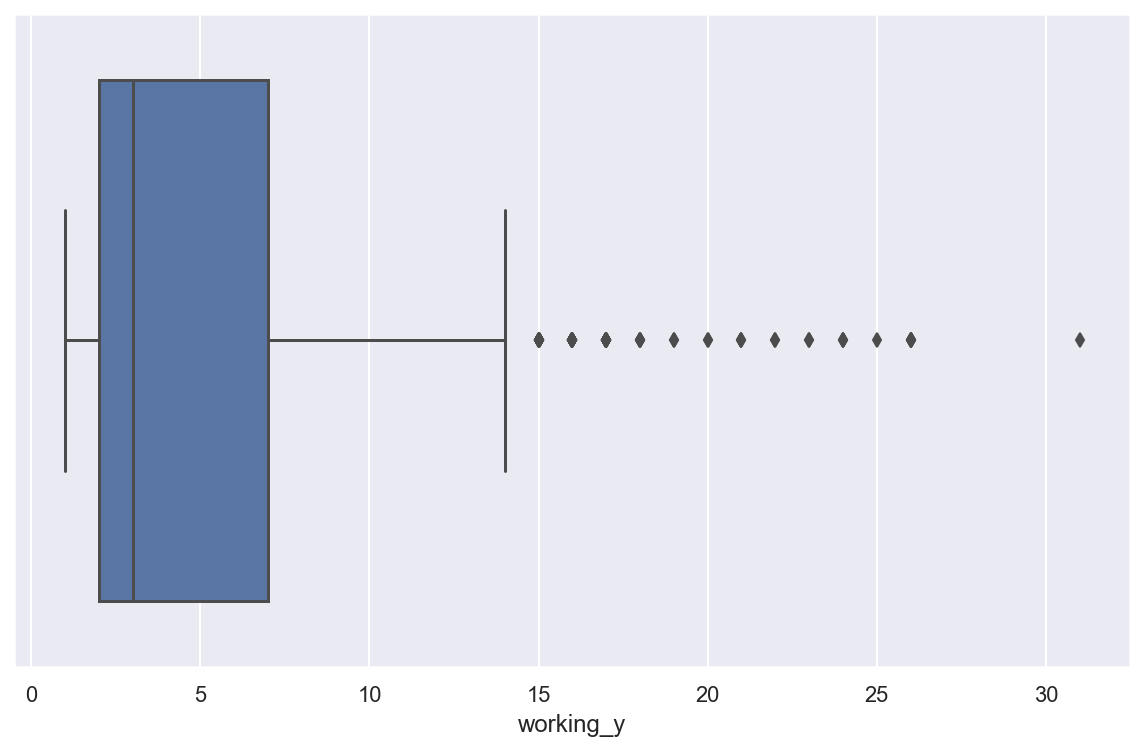

In [78]:
# 경력분포 확인-> 24년의 데이터가 이상 upper fence로 drop
plt.figure(figsize=(10, 6))
plt.plot()
sns.boxplot(data_fin_drop['working_y'])

plt.show()

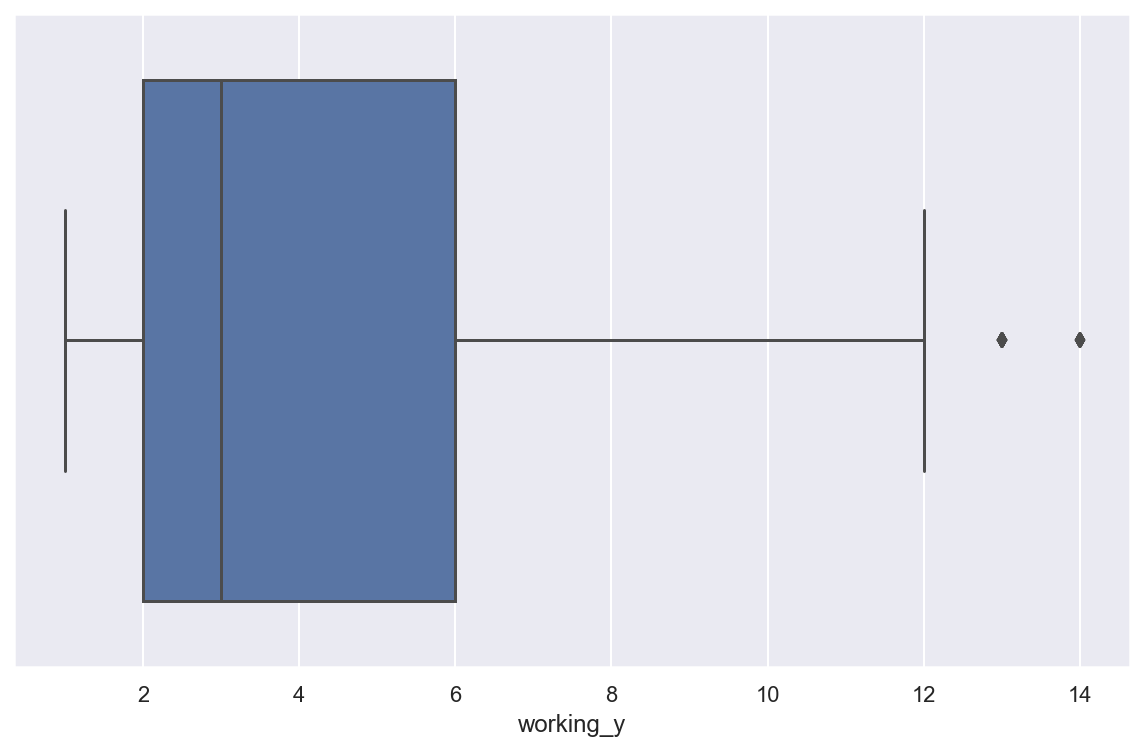

In [79]:
# 이상치를 제거한 경력 분포
plt.figure(figsize=(10, 6))
plt.plot()
sns.boxplot(data_fin_1['working_y'])

plt.show()

In [80]:
# 경력의 분포 확인하기 
fig_wy = px.histogram(data_fin_1, x='working_y')
fig_wy.show()

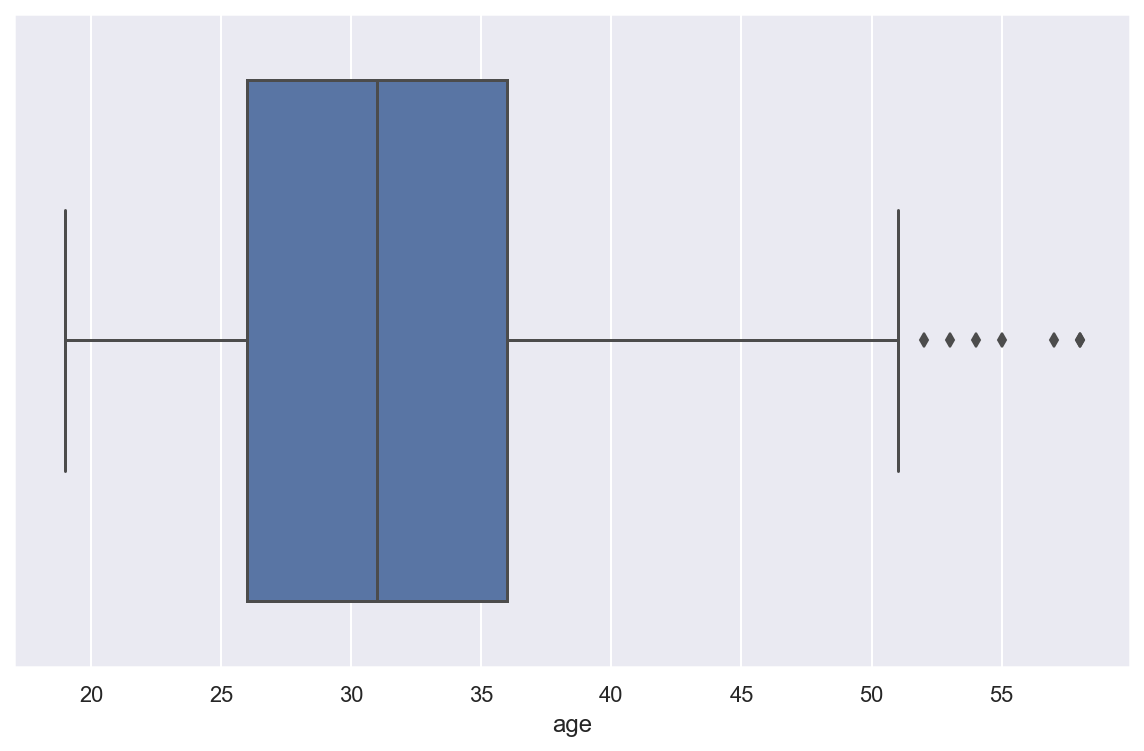

In [81]:
# 연령 분포 확인
plt.figure(figsize=(10, 6))
sns.boxplot(data_fin_1['age'])

plt.show()

In [82]:
# 연령의 분포 확인하기 
fig_age = px.histogram(age_pd, x='구분', y = '인원')
fig_age.show()

In [83]:
# 급여의 upper fence 확인
np.percentile(data_fin_1['JOBSAL'], 75), np.percentile(data_fin_1['JOBSAL'], 25)
np.percentile(data_fin_1['JOBSAL'], 75)+1.5*(np.percentile(data_fin_1['JOBSAL'], 75)- np.percentile(data_fin_1['JOBSAL'], 25))
# upper fence=350

350.0

In [84]:
# 350만원 이상을 이상치로 간주하고 제거
data_fin_1 = data_fin_1[data_fin_1['JOBSAL'] < 350]

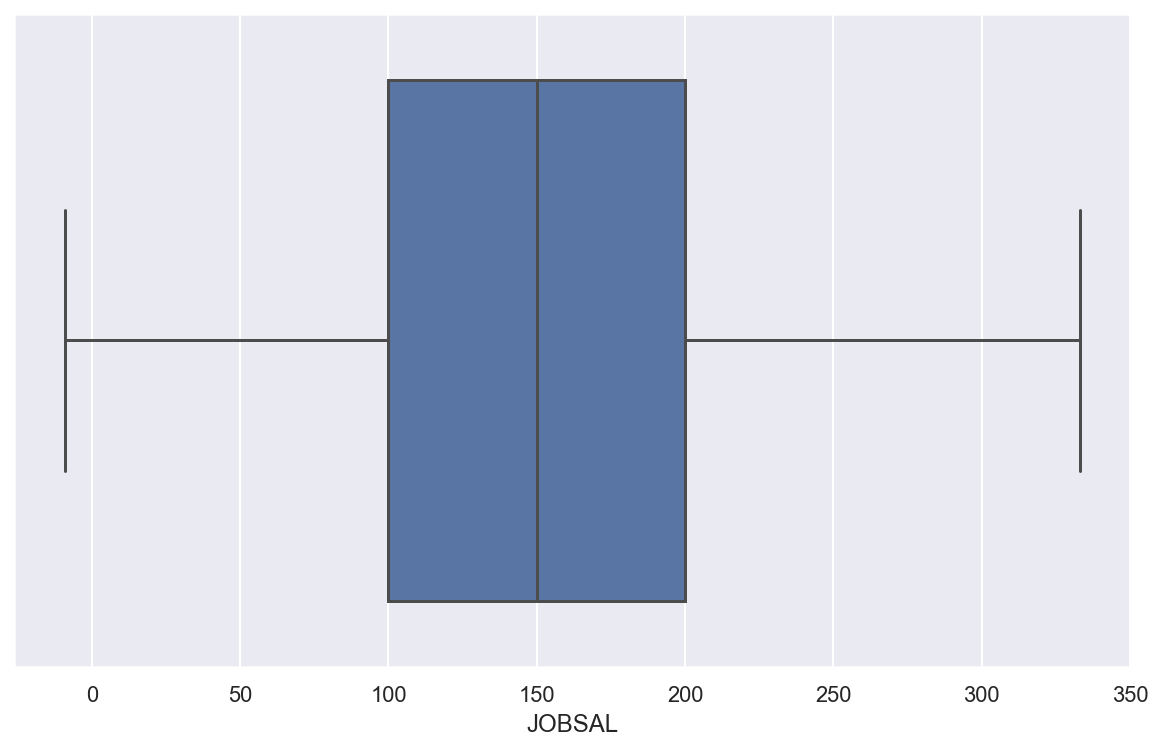

In [85]:
# 급여 분포 확인
plt.figure(figsize=(10, 6))
sns.boxplot(data_fin_1['JOBSAL'])
plt.show()

In [86]:
# 결혼 유경험자 : 1076명
print(len(data_fin_1[data_fin_1['marry_YN']==1]))
# 결혼 무경험자 : 801명
print(len(data_fin_1[data_fin_1['marry_YN']==2]))

618
658


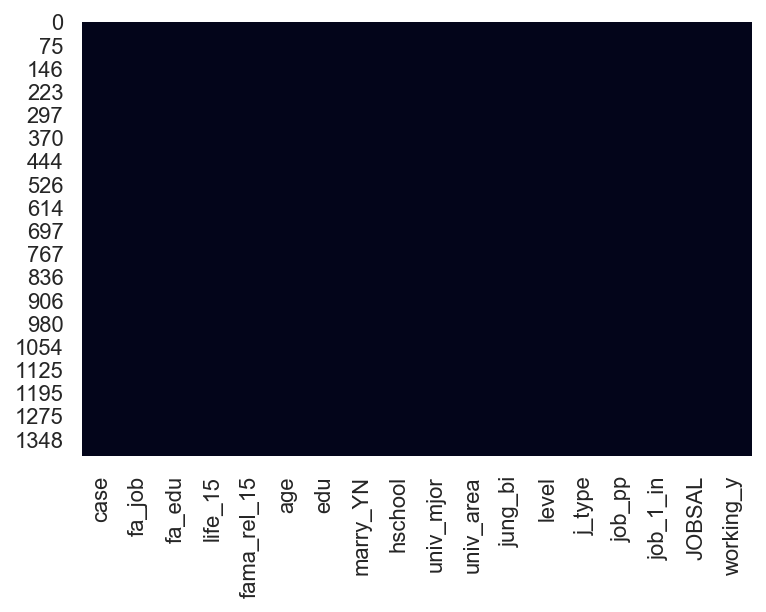

In [87]:
# 결측치 제거 결과
sns.heatmap(data_fin_1.isnull(), cbar=False);

In [88]:
# 경력 분포 히스토그램 확인 : 1-2년이 가장 많음
fig3 = px.histogram(data_fin_1, x='working_y')
fig3.show()

### 2-2. 변수 간 관계 확인

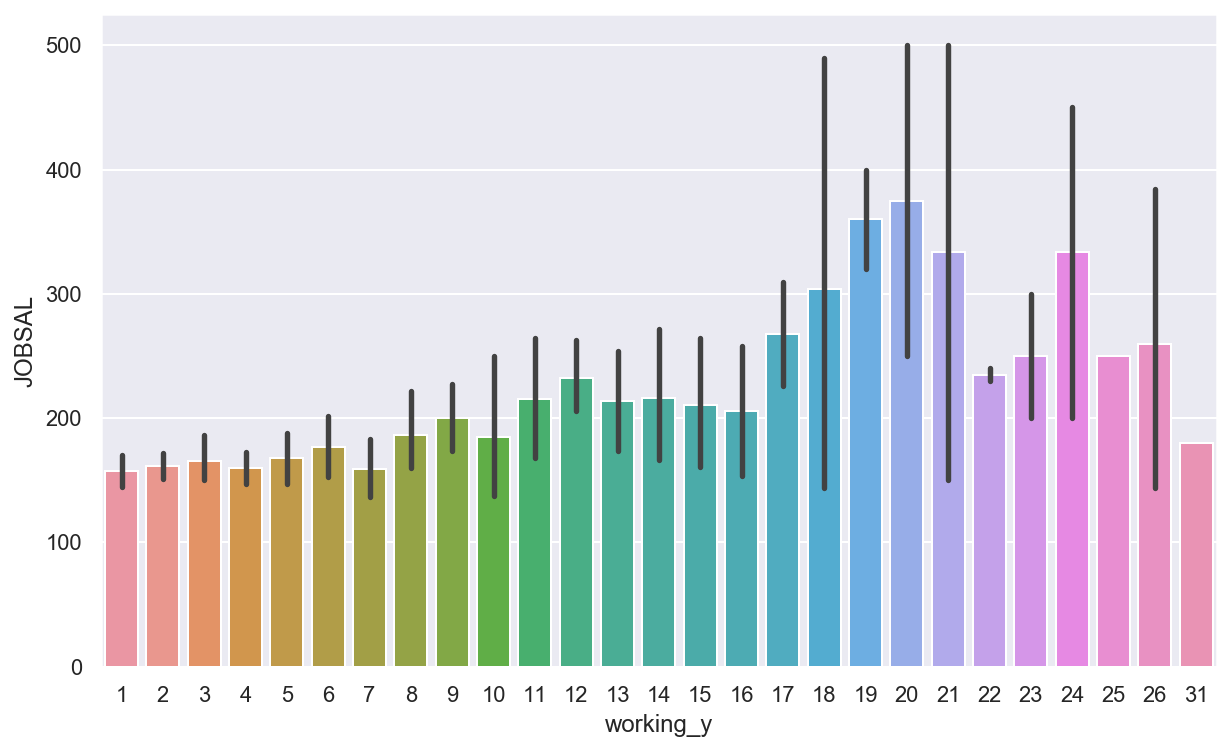

In [89]:
# 경력과 급여의 관계
plt.figure(figsize=(10, 6))
plt.plot()
sns.barplot(x="working_y", y='JOBSAL', data = data_fin_drop);

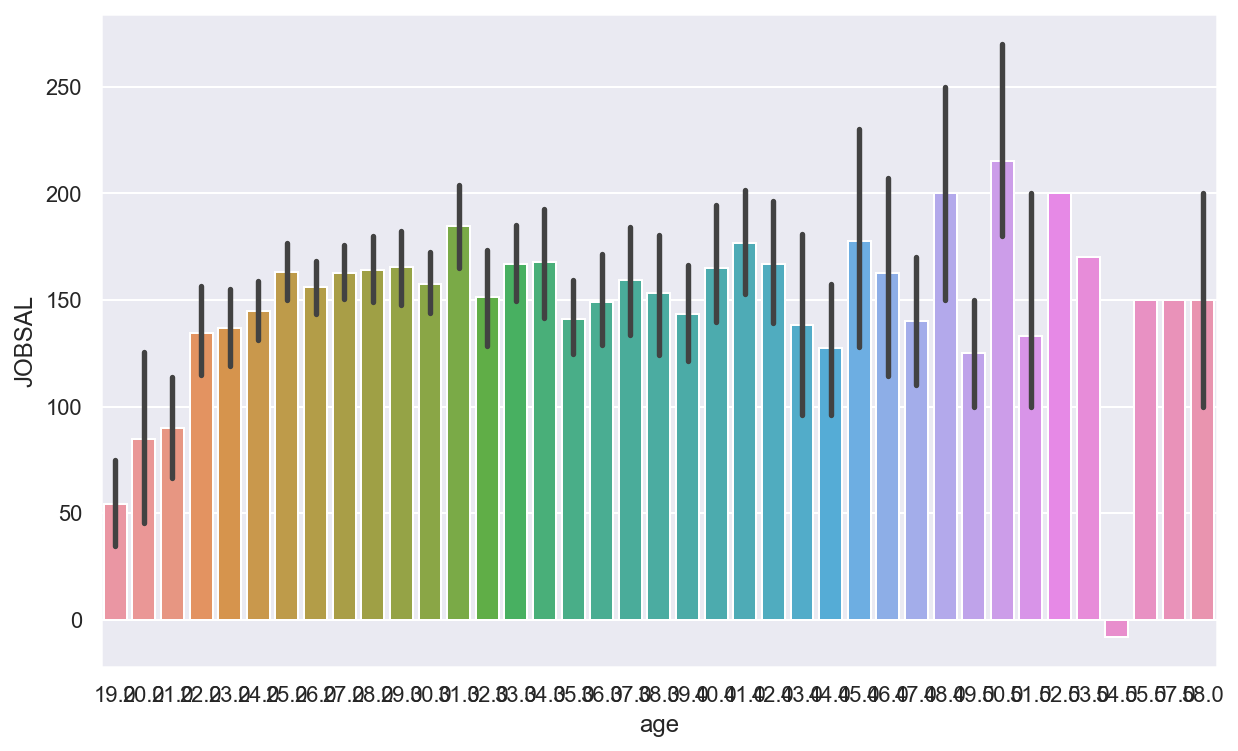

In [90]:
# 나이와 급여의 관계
plt.figure(figsize=(10, 6))
plt.plot()
sns.barplot(x="age", y='JOBSAL', data = data_fin_1)

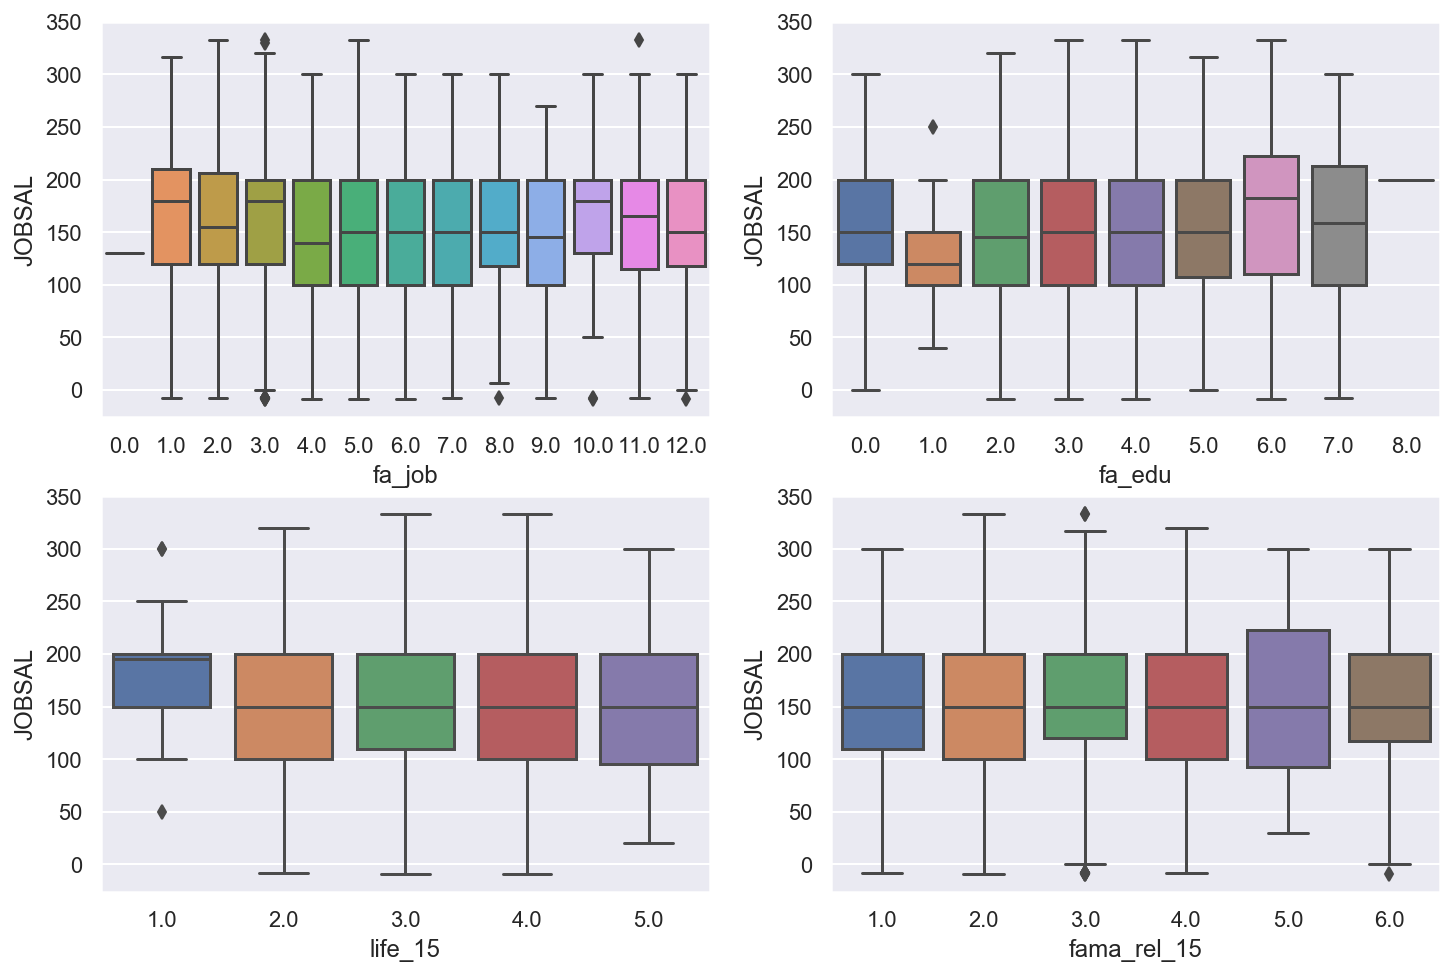

In [91]:
# 주요 변수 간 관계 확인
plt.figure(figsize=(12, 8))
plt.subplot(221)
# 15세 무렵 아버지의 직업과 평균 급여
sns.boxplot(x="fa_job", y='JOBSAL', data=data_fin_1)
plt.subplot(222)
# 15세 무렵 아버지의 교육 수준과 평균 급여
sns.boxplot(x="fa_edu", y='JOBSAL', data=data_fin_1)
plt.subplot(223)
# 15세 무렵 가정환경과 평균 급여
sns.boxplot(x="life_15", y='JOBSAL', data=data_fin_1)
plt.subplot(224)
# 15세 무렵 부모님의 관계와 평균 급여
sns.boxplot(x="fama_rel_15", y='JOBSAL', data=data_fin_1)


plt.show()

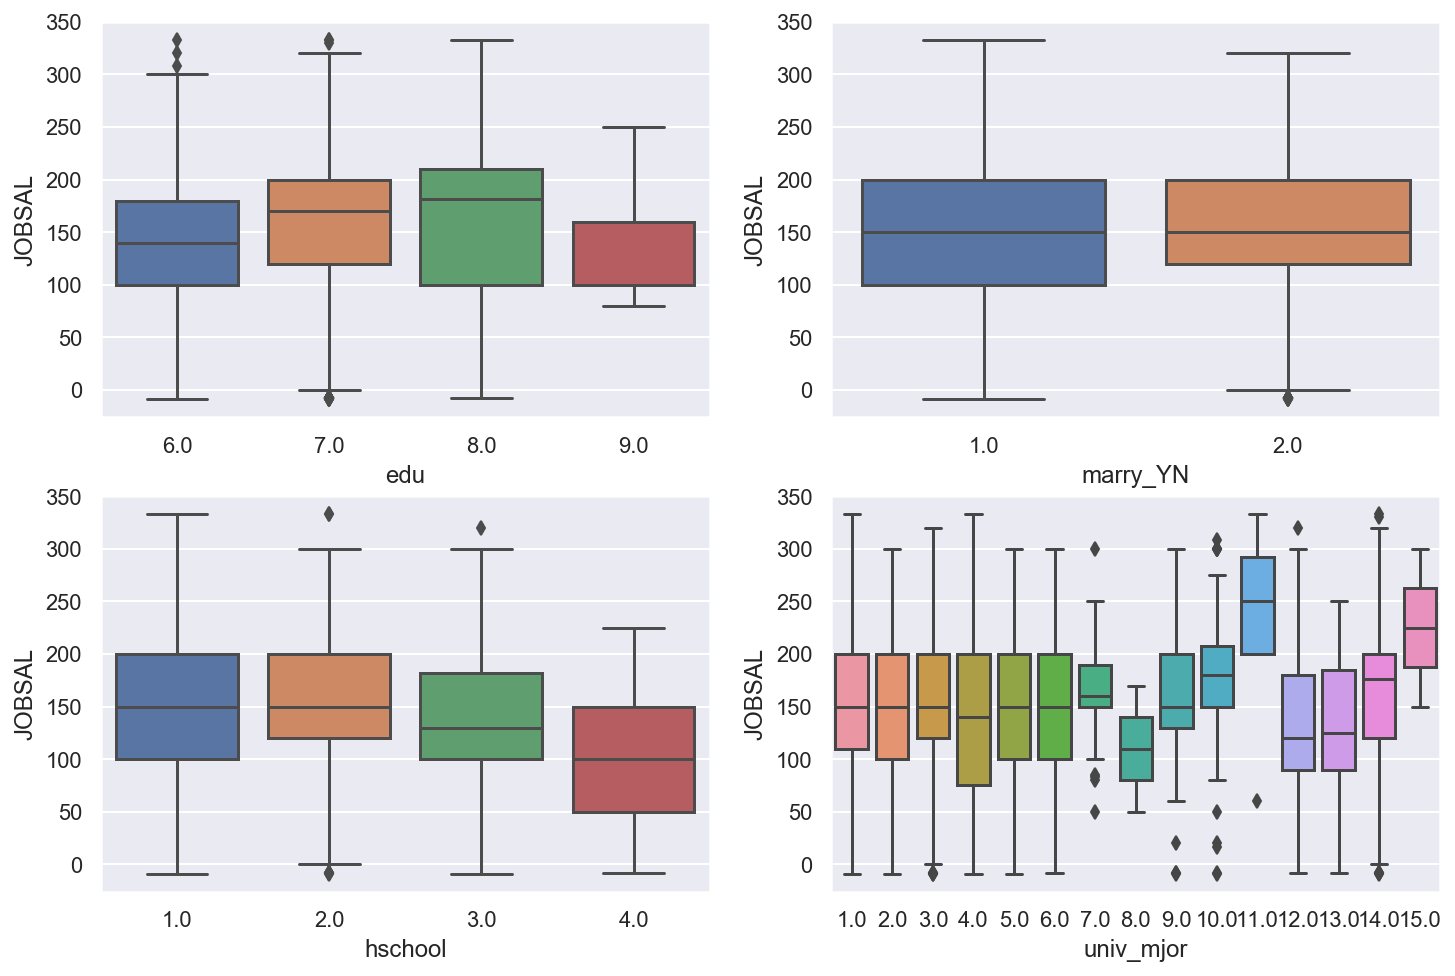

In [92]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
# 자신의 교육 수준과 평균 급여
sns.boxplot(x="edu", y='JOBSAL', data=data_fin_1)
plt.subplot(222)
# 결혼 여부와 평균 급여
sns.boxplot(x="marry_YN", y='JOBSAL', data=data_fin_1)
plt.subplot(223)
# 고등학교 유형과 평균 급여
sns.boxplot(x="hschool", y='JOBSAL', data=data_fin_1)
plt.subplot(224)
# 대학 전공과 평균 급여
sns.boxplot(x="univ_mjor", y='JOBSAL', data=data_fin_1)


plt.show()

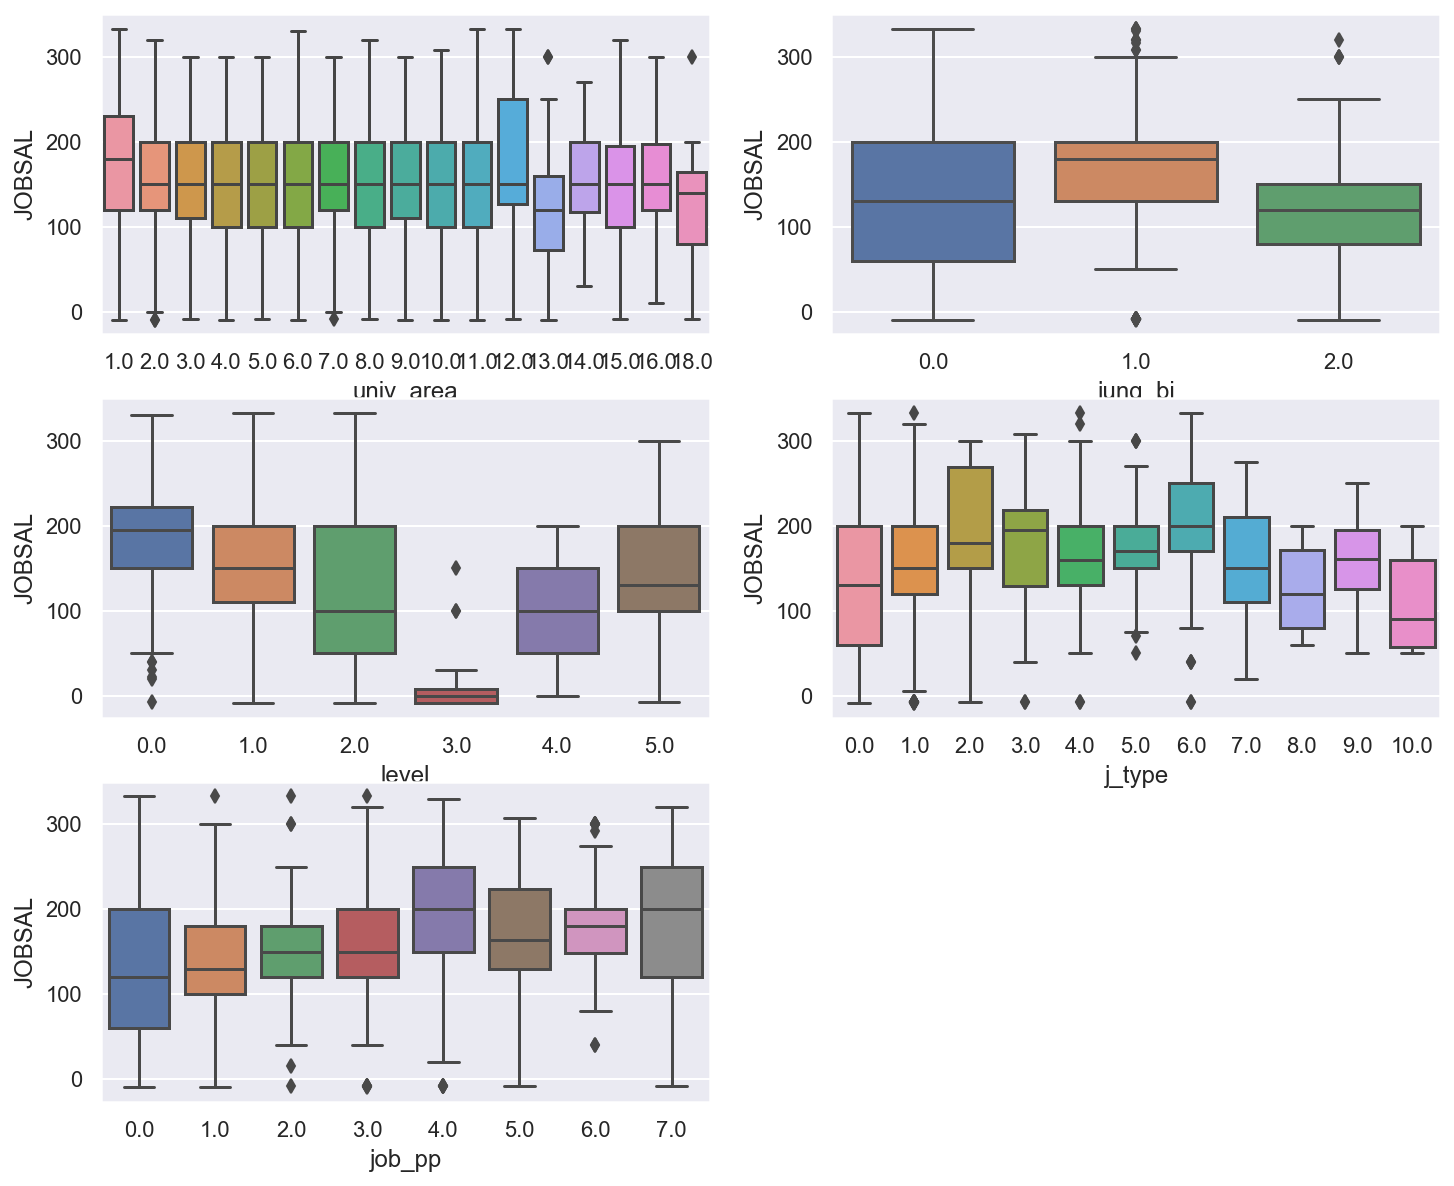

In [93]:
plt.figure(figsize=(12, 10))
plt.subplot(321)
# 대학교 소재지와 평균 급여
sns.boxplot(x="univ_area", y='JOBSAL', data=data_fin_1)
plt.subplot(322)
# 졍규직 여부와 평균 급여
sns.boxplot(x="jung_bi", y='JOBSAL', data=data_fin_1)
plt.subplot(323)
# 조직 내 직급과 평균 급여
sns.boxplot(x="level", y='JOBSAL', data=data_fin_1)
plt.subplot(324)
# 회사 유형과 평균 급여
sns.boxplot(x="j_type", y='JOBSAL', data=data_fin_1)
plt.subplot(325)
# 회사 인원과 평균 급여
sns.boxplot(x="job_pp", y='JOBSAL', data=data_fin_1)


plt.show()

C:\Users\eunice\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\eunice\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



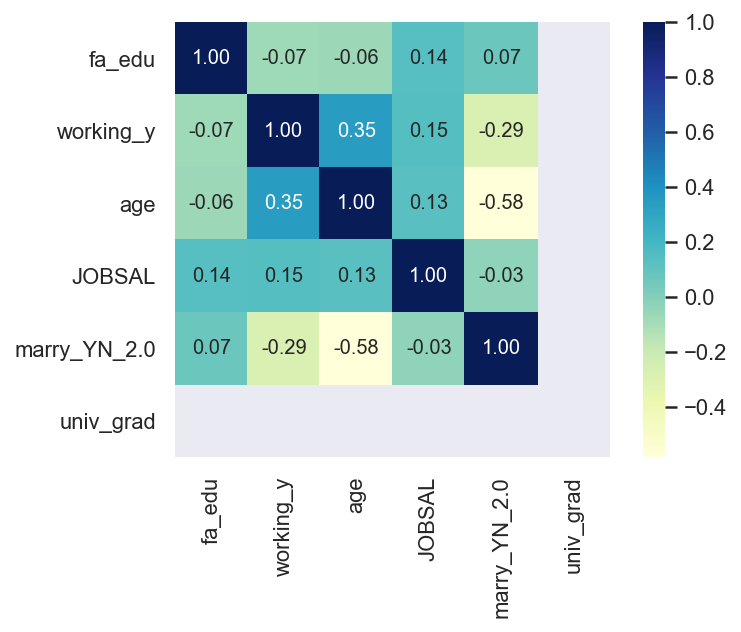

In [94]:
# 주요 변수 간 관계 확인
# 대졸여부로 표기한 데이터 data_fin_2로 상관관계 히트맵 확인
cols = ['fa_edu','working_y', 'age', 'JOBSAL', 'marry_YN_2.0', 'univ_grad']
cm = np.corrcoef(data_fin_2[cols].values.T)
sns.set(font_scale=1.0)
sns.heatmap(cm, cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10}, 
            yticklabels=cols,
                 xticklabels=cols, 
                cmap="YlGnBu");

### 2-3. 분석을 위한 변수 선정 및 원핫 인코딩

In [95]:
# 분석과 관계없는 변수 drop
data_fin_2.drop(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'hschool',
                 'univ_mjor', 'level', 'j_type', 'job_pp', 'marry_YN_1.0',
                 'univ_area_4.0', 'jung_bi_0.0', 'jung_bi_2.0','job_1_in'], axis=1, inplace=True)

In [96]:
data_fin_2.columns

Index(['age', 'JOBSAL', 'working_y', 'marry_YN_2.0', 'univ_area_1.0',
       'jung_bi_1.0', 'univ_grad'],
      dtype='object')

In [97]:
# 대졸여부 / 미혼 여부/ 인서울 대학여부/ 정규직 여부/ 대학졸업여부
data_fin_2.columns = ['age', 'JOBSAL', 'working_y', 'marry_no', 'univ_in_seoul',
       'fulltime_job', 'univ_grad']

In [98]:
data_fin_2

age  JOBSAL  working_y  marry_no  univ_in_seoul  fulltime_job  \
0     32.0   180.0         10         0              0             1   
1     31.0   200.0          1         1              1             1   
2     25.0   200.0          2         1              0             1   
3     25.0   150.0          2         1              1             0   
4     22.0   200.0          5         1              0             1   
...    ...     ...        ...       ...            ...           ...   
1400  36.0   300.0          1         1              1             1   
1401  41.0   140.0          8         0              0             1   
1402  47.0   200.0          2         0              0             1   
1403  36.0   250.0          3         0              0             1   
1404  28.0   250.0          3         1              0             1   

      univ_grad  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
1400          1  
1401          1  
1402          1  
1403          1  
1404          1  

[1332 rows x 7 columns]

# Step3. Modeling
- 사용 모델
    - LinearRegression
    - DecisionTree Regressor
    - RandomForest Regressor
    - GradientBoosting Regressor
    - XGBregressor
    - OLS

In [99]:
# 사용 모델 리스트 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [100]:
# scaler, pipeline, mse, r2 
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor()))

In [102]:
models

[('LinearRegression', LinearRegression()),
 ('DecisionTreeRegressor', DecisionTreeRegressor()),
 ('RandomForestRegressor', RandomForestRegressor()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('XGBRegressor',
  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None))]

> 1. 범주형 변수 그대로 사용 버젼

In [103]:
data_fin_1

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
0      1.0     5.0     4.0      3.0          2.0  32.0  6.0       1.0   
1      3.0     7.0     4.0      3.0          3.0  31.0  7.0       2.0   
2      1.0     3.0     5.0      3.0          2.0  25.0  7.0       2.0   
3      3.0     8.0     4.0      3.0          3.0  25.0  6.0       2.0   
4      1.0     5.0     4.0      3.0          3.0  22.0  6.0       2.0   
...    ...     ...     ...      ...          ...   ...  ...       ...   
1400   6.0     3.0     4.0      3.0          3.0  36.0  7.0       2.0   
1401   6.0     3.0     4.0      3.0          3.0  41.0  7.0       1.0   
1402   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
1403   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
1404   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  univ_area  jung_bi  level  j_type  job_pp  job_1_in  \
0         1.0        7.0       15.0      1.0    1.0     1.0     4.0    1997.0   
1         2.0        9.0        1.0      1.0    1.0     1.0     7.0    2009.0   
2         1.0        3.0        2.0      1.0    1.0     1.0     7.0    2005.0   
3         3.0        6.0        1.0      2.0    1.0     1.0     2.0    2008.0   
4         3.0        3.0       14.0      1.0    1.0     1.0     4.0    2002.0   
...       ...        ...        ...      ...    ...     ...     ...       ...   
1400      1.0       10.0        1.0      1.0    0.0     3.0     4.0    2005.0   
1401      1.0        6.0        3.0      1.0    0.0     1.0     1.0    1995.0   
1402      1.0        6.0        6.0      1.0    0.0     1.0     2.0    1992.0   
1403      1.0       10.0        6.0      1.0    0.0     1.0     5.0    2003.0   
1404      1.0       12.0        2.0      1.0    0.0     9.0     3.0    2011.0   

      JOBSAL  working_y  
0      180.0         10  
1      200.0          1  
2      200.0          2  
3      150.0          2  
4      200.0          5  
...      ...        ...  
1400   300.0          1  
1401   140.0          8  
1402   200.0          2  
1403   250.0          3  
1404   250.0          3  

[1276 rows x 18 columns]

In [104]:
X = data_fin_1.drop(['case', 'JOBSAL'], axis=1)
y = data_fin_1['JOBSAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)

In [107]:
names = []
train_r2_score = []
test_r2_score = []

for name, model in models:
    model.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(r2_score(y_train, y_pred_tr))
    test_r2_score.append(r2_score(y_test, y_pred_test))

In [108]:
result_r2 = pd.DataFrame({
    "model_name" : names,
    "train_r2_score" : train_r2_score,
    "test_r2_score" : test_r2_score
})

In [109]:
# 모델은 default일 때 R2
result_r2

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.249168       0.171642
1      DecisionTreeRegressor        0.249168       0.171642
2      RandomForestRegressor        0.249168       0.171642
3  GradientBoostingRegressor        0.249168       0.171642
4               XGBRegressor        0.249168       0.171642

In [110]:
names = []
train_rmse_score = []
test_rmse_score = []

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_rmse_score.append(np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    test_rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [111]:
result_rmse = pd.DataFrame({
    "model_name" : names,
    "train_rmse_score" : train_rmse_score,
    "test_rmse_score" : test_rmse_score
})

In [112]:
# 모델은 default일 때 RMSE
result_rmse

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         65.003232        65.914169
1      DecisionTreeRegressor          0.000000        90.306423
2      RandomForestRegressor         24.063852        64.397450
3  GradientBoostingRegressor         50.029533        65.543640
4               XGBRegressor          6.308094        73.804426

In [113]:
# OLS 모델 결과 R2 -> 0.74
ols = sm.OLS(y, X)
result = ols.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              465.5
Date:                Fri, 08 Jan 2021   Prob (F-statistic):                        0.00
Time:                        16:40:56   Log-Likelihood:                         -7148.8
No. Observations:                1276   AIC:                                  1.433e+04
Df Residuals:                    1260   BIC:                                  1.441e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

> 심각한 과적합들 발생.. 하이퍼파라미터 수정 후 재시도

In [114]:
models_tu = []
models_tu.append(('LinearRegression', LinearRegression()))
models_tu.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=5)))
models_tu.append(('RandomForestRegressor', RandomForestRegressor(max_depth=4)))
models_tu.append(('GradientBoostingRegressor', GradientBoostingRegressor(max_depth=4)))
models_tu.append(('XGBRegressor', XGBRegressor(max_depth=3)))

In [115]:
names = []
train_r2_score = []
test_r2_score = []

for name, model in models_tu:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(r2_score(y_train, y_pred_tr))
    test_r2_score.append(r2_score(y_test, y_pred_test))

In [116]:
result_r2_1 = pd.DataFrame({
    "model_name" : names,
    "train_r2_score" : train_r2_score,
    "test_r2_score" : test_r2_score
})

In [117]:
# 모델 max_depth만 변경한 R2
result_r2_1

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.249168       0.171642
1      DecisionTreeRegressor        0.354511       0.102417
2      RandomForestRegressor        0.362540       0.229162
3  GradientBoostingRegressor        0.680902       0.159147
4               XGBRegressor        0.711662       0.070414

In [118]:
# 모델 default일 때 R2
result_r2

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.249168       0.171642
1      DecisionTreeRegressor        0.249168       0.171642
2      RandomForestRegressor        0.249168       0.171642
3  GradientBoostingRegressor        0.249168       0.171642
4               XGBRegressor        0.249168       0.171642

In [119]:
names = []
train_rmse_score = []
test_rmse_score = []

for name, model in models_tu:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_rmse_score.append(np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    test_rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [120]:
result_rmse_1 = pd.DataFrame({
    "model_name" : names,
    "train_rmse_score" : train_rmse_score,
    "test_rmse_score" : test_rmse_score
})

In [121]:
# 모델 max_depth만 변경한 RMSE
result_rmse_1

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         65.003232        65.914169
1      DecisionTreeRegressor         60.270924        69.258351
2      RandomForestRegressor         59.694048        63.695725
3  GradientBoostingRegressor         42.376543        66.454910
4               XGBRegressor         40.282304        69.825605

In [122]:
# 모델 default일 때 RMSE
result_rmse

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         65.003232        65.914169
1      DecisionTreeRegressor          0.000000        90.306423
2      RandomForestRegressor         24.063852        64.397450
3  GradientBoostingRegressor         50.029533        65.543640
4               XGBRegressor          6.308094        73.804426

> 2. get_dummies 사용한 버젼 

In [124]:
data_dummy = pd.get_dummies(data_fin_1, columns=['fa_job', 'fa_edu', 'life_15', 'fama_rel_15'
                                                 , 'edu', 'marry_YN', 'hschool', 'univ_mjor'
                                                 , 'univ_area', 'jung_bi', 'level', 'j_type', 'job_pp'])

In [125]:
data_dummy

case   age  job_1_in  JOBSAL  working_y  fa_job_0.0  fa_job_1.0  \
0      1.0  32.0    1997.0   180.0         10           0           0   
1      3.0  31.0    2009.0   200.0          1           0           0   
2      1.0  25.0    2005.0   200.0          2           0           0   
3      3.0  25.0    2008.0   150.0          2           0           0   
4      1.0  22.0    2002.0   200.0          5           0           0   
...    ...   ...       ...     ...        ...         ...         ...   
1400   6.0  36.0    2005.0   300.0          1           0           0   
1401   6.0  41.0    1995.0   140.0          8           0           0   
1402   6.0  47.0    1992.0   200.0          2           0           0   
1403   6.0  36.0    2003.0   250.0          3           0           0   
1404   6.0  28.0    2011.0   250.0          3           0           0   

      fa_job_2.0  fa_job_3.0  fa_job_4.0  ...  j_type_9.0  j_type_10.0  \
0              0           0           0  ...           0            0   
1              0           0           0  ...           0            0   
2              0           1           0  ...           0            0   
3              0           0           0  ...           0            0   
4              0           0           0  ...           0            0   
...          ...         ...         ...  ...         ...          ...   
1400           0           1           0  ...           0            0   
1401           0           1           0  ...           0            0   
1402           0           0           0  ...           0            0   
1403           0           0           0  ...           0            0   
1404           0           0           0  ...           1            0   

      job_pp_0.0  job_pp_1.0  job_pp_2.0  job_pp_3.0  job_pp_4.0  job_pp_5.0  \
0              0           0           0           0           1           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           1           0           0           0   
4              0           0           0           0           1           0   
...          ...         ...         ...         ...         ...         ...   
1400           0           0           0           0           1           0   
1401           0           1           0           0           0           0   
1402           0           0           1           0           0           0   
1403           0           0           0           0           0           1   
1404           0           0           0           1           0           0   

      job_pp_6.0  job_pp_7.0  
0              0           0  
1              0           1  
2              0           1  
3              0           0  
4              0           0  
...          ...         ...  
1400           0           0  
1401           0           0  
1402           0           0  
1403           0           0  
1404           0           0  

[1276 rows x 108 columns]

In [126]:
X = data_dummy.drop(['case', 'JOBSAL'], axis=1)
y = data_dummy['JOBSAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)

In [127]:
names = []
train_r2_score = []
test_r2_score = []

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(r2_score(y_train, y_pred_tr))
    test_r2_score.append(r2_score(y_test, y_pred_test))

In [128]:
result_dum_r2 = pd.DataFrame({
    "model_name" : names,
    "train_r2_score" : train_r2_score,
    "test_r2_score" : test_r2_score
})

In [129]:
# 모델 defualt, dummies변수 일 때 R2
result_dum_r2

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.390673       0.110661
1      DecisionTreeRegressor        1.000000      -0.547282
2      RandomForestRegressor        0.902533       0.193238
3  GradientBoostingRegressor        0.554196       0.201791
4               XGBRegressor        0.987466      -0.025435

In [130]:
names = []
train_rmse_score = []
test_rmse_score = []

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_rmse_score.append(np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    test_rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [131]:
result_dum_rmse = pd.DataFrame({
    "model_name" : names,
    "train_rmse_score" : train_rmse_score,
    "test_rmse_score" : test_rmse_score
})

In [132]:
# 모델 defualt, dummies변수 일 때 RMSE
result_dum_rmse

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         58.558352        68.297295
1      DecisionTreeRegressor          0.000000        88.606310
2      RandomForestRegressor         23.686904        63.901987
3  GradientBoostingRegressor         50.088192        64.748589
4               XGBRegressor          8.398694        73.337142

In [133]:
# dummies 변수일 떄 R2 -> 0.23
ols = sm.OLS(y, X)
result = ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 JOBSAL   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     7.014
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           6.31e-64
Time:                        16:44:40   Log-Likelihood:                -7032.2
No. Observations:                1276   AIC:                         1.425e+04
Df Residuals:                    1182   BIC:                         1.474e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 1.0381      0.494     

In [134]:
names = []
train_r2_score = []
test_r2_score = []

for name, model in models_tu:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(r2_score(y_train, y_pred_tr))
    test_r2_score.append(r2_score(y_test, y_pred_test))

In [135]:
result_dum_r2_1 = pd.DataFrame({
    "model_name" : names,
    "train_r2_score" : train_r2_score,
    "test_r2_score" : test_r2_score
})

In [136]:
# 모델 max_depth 변경, dummy 변수 R2
result_dum_r2_1

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.390673       0.110661
1      DecisionTreeRegressor        0.366911       0.156929
2      RandomForestRegressor        0.363164       0.211074
3  GradientBoostingRegressor        0.679352       0.188832
4               XGBRegressor        0.731528       0.134005

In [137]:
# 모델 defualt, dummy 변수 R2
result_dum_r2

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.390673       0.110661
1      DecisionTreeRegressor        1.000000      -0.547282
2      RandomForestRegressor        0.902533       0.193238
3  GradientBoostingRegressor        0.554196       0.201791
4               XGBRegressor        0.987466      -0.025435

In [138]:
names = []
train_rmse_score = []
test_rmse_score = []

for name, model in models_tu:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_rmse_score.append(np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    test_rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [139]:
result_dum_rmse_1 = pd.DataFrame({
    "model_name" : names,
    "train_rmse_score" : train_rmse_score,
    "test_rmse_score" : test_rmse_score
})

In [140]:
# 모델 max_depth 변경, dummy 변수 RMSE
result_dum_rmse_1

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         58.558352        68.297295
1      DecisionTreeRegressor         59.689219        66.496991
2      RandomForestRegressor         59.884921        64.115330
3  GradientBoostingRegressor         42.479339        65.167188
4               XGBRegressor         38.869831        67.394982

In [141]:
# 모델 defualt, dummy 변수 RMSE
result_dum_rmse

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         58.558352        68.297295
1      DecisionTreeRegressor          0.000000        88.606310
2      RandomForestRegressor         23.686904        63.901987
3  GradientBoostingRegressor         50.088192        64.748589
4               XGBRegressor          8.398694        73.337142

> 더미변수로 바꿔도 R2, RMSE 값에 큰 차이가 없음..

## 컬럼수 줄이기 
- 'jung_bi', 'level', 'j_type', 'job_pp' -> drop하기
- 'univ_area' -> 서울, 수도권 1 / 나머지 0

In [153]:
data_oh = pd.read_csv(".data/result_one_hot2")
data_oh

case  fa_job  fa_edu  life_15  fama_rel_15   age  hschool  univ_mjor  \
0      1.0     5.0     4.0      3.0          2.0  32.0      1.0        7.0   
1      4.0     2.0     6.0      3.0          4.0  19.0      1.0        0.0   
2      4.0     7.0     3.0      3.0          3.0  19.0      3.0        0.0   
3      3.0     7.0     4.0      3.0          3.0  31.0      2.0        9.0   
4      1.0     3.0     5.0      3.0          2.0  25.0      1.0        3.0   
...    ...     ...     ...      ...          ...   ...      ...        ...   
1872   6.0     7.0     4.0      3.0          3.0  47.0      1.0        6.0   
1873   6.0    12.0     0.0      2.0          6.0  36.0      1.0       10.0   
1874   6.0     8.0     3.0      3.0          3.0  36.0      3.0        0.0   
1875   6.0     6.0     2.0      4.0          3.0  42.0      3.0        0.0   
1876   6.0     7.0     4.0      3.0          2.0  28.0      1.0       12.0   

      level  j_type  ...  jung_bi_1.0  jung_bi_2.0  job_pp_0.0  job_pp_1.0  \
0       1.0     1.0  ...            1            0           0           0   
1       1.0     2.0  ...            0            1           0           0   
2       1.0     1.0  ...            1            0           0           0   
3       1.0     1.0  ...            1            0           0           0   
4       1.0     1.0  ...            1            0           0           0   
...     ...     ...  ...          ...          ...         ...         ...   
1872    0.0     1.0  ...            1            0           0           0   
1873    0.0     1.0  ...            1            0           0           0   
1874    0.0     1.0  ...            1            0           0           0   
1875    0.0     1.0  ...            0            1           0           1   
1876    0.0     9.0  ...            1            0           0           0   

      job_pp_2.0  job_pp_3.0  job_pp_4.0  job_pp_5.0  job_pp_6.0  job_pp_7.0  
0              0           0           1           0           0           0  
1              1           0           0           0           0           0  
2              0           0           0           1           0           0  
3              0           0           0           0           0           1  
4              0           0           0           0           0           1  
...          ...         ...         ...         ...         ...         ...  
1872           1           0           0           0           0           0  
1873           0           0           0           1           0           0  
1874           1           0           0           0           0           0  
1875           0           0           0           0           0           0  
1876           0           1           0           0           0           0  

[1877 rows x 52 columns]

In [154]:
data_oh.columns.unique()

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'hschool',
       'univ_mjor', 'level', 'j_type', 'JOBSAL', 'working_y', 'edu_1.0',
       'edu_2.0', 'edu_3.0', 'edu_4.0', 'edu_5.0', 'edu_6.0', 'edu_7.0',
       'edu_8.0', 'edu_9.0', 'marry_YN_1.0', 'marry_YN_2.0', 'univ_area_0.0',
       'univ_area_1.0', 'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0',
       'univ_area_5.0', 'univ_area_6.0', 'univ_area_7.0', 'univ_area_8.0',
       'univ_area_9.0', 'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0',
       'univ_area_13.0', 'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0',
       'univ_area_18.0', 'jung_bi_0.0', 'jung_bi_1.0', 'jung_bi_2.0',
       'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0',
       'job_pp_5.0', 'job_pp_6.0', 'job_pp_7.0'],
      dtype='object')

In [155]:
data_oh.drop(data_oh[data_oh["case"]==1].index, inplace=True)

In [156]:
data_oh.drop(data_oh[data_oh["case"]==2].index, inplace=True)

In [157]:
data_oh

case  fa_job  fa_edu  life_15  fama_rel_15   age  hschool  univ_mjor  \
1      4.0     2.0     6.0      3.0          4.0  19.0      1.0        0.0   
2      4.0     7.0     3.0      3.0          3.0  19.0      3.0        0.0   
3      3.0     7.0     4.0      3.0          3.0  31.0      2.0        9.0   
5      3.0    12.0     1.0      5.0          6.0  27.0      3.0        0.0   
6      3.0     8.0     4.0      3.0          3.0  25.0      3.0        6.0   
...    ...     ...     ...      ...          ...   ...      ...        ...   
1872   6.0     7.0     4.0      3.0          3.0  47.0      1.0        6.0   
1873   6.0    12.0     0.0      2.0          6.0  36.0      1.0       10.0   
1874   6.0     8.0     3.0      3.0          3.0  36.0      3.0        0.0   
1875   6.0     6.0     2.0      4.0          3.0  42.0      3.0        0.0   
1876   6.0     7.0     4.0      3.0          2.0  28.0      1.0       12.0   

      level  j_type  ...  jung_bi_1.0  jung_bi_2.0  job_pp_0.0  job_pp_1.0  \
1       1.0     2.0  ...            0            1           0           0   
2       1.0     1.0  ...            1            0           0           0   
3       1.0     1.0  ...            1            0           0           0   
5       1.0     1.0  ...            0            1           0           0   
6       1.0     1.0  ...            0            1           0           0   
...     ...     ...  ...          ...          ...         ...         ...   
1872    0.0     1.0  ...            1            0           0           0   
1873    0.0     1.0  ...            1            0           0           0   
1874    0.0     1.0  ...            1            0           0           0   
1875    0.0     1.0  ...            0            1           0           1   
1876    0.0     9.0  ...            1            0           0           0   

      job_pp_2.0  job_pp_3.0  job_pp_4.0  job_pp_5.0  job_pp_6.0  job_pp_7.0  
1              1           0           0           0           0           0  
2              0           0           0           1           0           0  
3              0           0           0           0           0           1  
5              1           0           0           0           0           0  
6              1           0           0           0           0           0  
...          ...         ...         ...         ...         ...         ...  
1872           1           0           0           0           0           0  
1873           0           0           0           1           0           0  
1874           1           0           0           0           0           0  
1875           0           0           0           0           0           0  
1876           0           1           0           0           0           0  

[690 rows x 52 columns]

In [158]:
faedu = pd.get_dummies(data_oh, columns=['fa_edu'])

In [159]:
faedu.columns

Index(['case', 'fa_job', 'life_15', 'fama_rel_15', 'age', 'hschool',
       'univ_mjor', 'level', 'j_type', 'JOBSAL', 'working_y', 'edu_1.0',
       'edu_2.0', 'edu_3.0', 'edu_4.0', 'edu_5.0', 'edu_6.0', 'edu_7.0',
       'edu_8.0', 'edu_9.0', 'marry_YN_1.0', 'marry_YN_2.0', 'univ_area_0.0',
       'univ_area_1.0', 'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0',
       'univ_area_5.0', 'univ_area_6.0', 'univ_area_7.0', 'univ_area_8.0',
       'univ_area_9.0', 'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0',
       'univ_area_13.0', 'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0',
       'univ_area_18.0', 'jung_bi_0.0', 'jung_bi_1.0', 'jung_bi_2.0',
       'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0',
       'job_pp_5.0', 'job_pp_6.0', 'job_pp_7.0', 'fa_edu_0.0', 'fa_edu_1.0',
       'fa_edu_2.0', 'fa_edu_3.0', 'fa_edu_4.0', 'fa_edu_5.0', 'fa_edu_6.0',
       'fa_edu_7.0'],
      dtype='object')

In [160]:
# 대졸 여부로 나눠서 보기

In [161]:
faedu['univ_grad'] = 0

In [162]:
faedu['univ_grad'] = faedu['edu_6.0'] + faedu['edu_7.0'] + faedu['edu_8.0'] + faedu['edu_9.0']

In [163]:
faedu['univ_grad']

1       0
2       0
3       1
5       0
6       1
       ..
1872    1
1873    1
1874    0
1875    0
1876    1
Name: univ_grad, Length: 690, dtype: int64

In [164]:
faedu['fa_edu']=0

In [165]:
faedu.columns

Index(['case', 'fa_job', 'life_15', 'fama_rel_15', 'age', 'hschool',
       'univ_mjor', 'level', 'j_type', 'JOBSAL', 'working_y', 'edu_1.0',
       'edu_2.0', 'edu_3.0', 'edu_4.0', 'edu_5.0', 'edu_6.0', 'edu_7.0',
       'edu_8.0', 'edu_9.0', 'marry_YN_1.0', 'marry_YN_2.0', 'univ_area_0.0',
       'univ_area_1.0', 'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0',
       'univ_area_5.0', 'univ_area_6.0', 'univ_area_7.0', 'univ_area_8.0',
       'univ_area_9.0', 'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0',
       'univ_area_13.0', 'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0',
       'univ_area_18.0', 'jung_bi_0.0', 'jung_bi_1.0', 'jung_bi_2.0',
       'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0',
       'job_pp_5.0', 'job_pp_6.0', 'job_pp_7.0', 'fa_edu_0.0', 'fa_edu_1.0',
       'fa_edu_2.0', 'fa_edu_3.0', 'fa_edu_4.0', 'fa_edu_5.0', 'fa_edu_6.0',
       'fa_edu_7.0', 'univ_grad', 'fa_edu'],
      dtype='object')

In [166]:
# 아빠 교육 수준 대졸 여부로 나눠보기

In [167]:
faedu['fa_edu'] = faedu['fa_edu_5.0'] + faedu['fa_edu_6.0'] + faedu['fa_edu_7.0']

In [168]:
faedu.drop(['edu_1.0', 'edu_2.0','edu_3.0','edu_4.0','edu_5.0', 'edu_6.0', 'edu_9.0','edu_8.0'], axis=1, inplace=True)

In [169]:
faedu.drop(['fa_edu_0.0', 'fa_edu_1.0', 'fa_edu_2.0', 'fa_edu_3.0', 'fa_edu_4.0', 'fa_edu_5.0', 'fa_edu_6.0', 'fa_edu_7.0'], axis=1, inplace=True)

In [170]:
X = faedu.drop(['case','JOBSAL', 'fa_job', 'life_15', 'fama_rel_15', 'j_type', 'level',
                  'hschool', 'univ_mjor', 
                  'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0', 'univ_area_5.0', 'univ_area_6.0', 
                  'univ_area_7.0', 'univ_area_8.0', 'univ_area_9.0', 'univ_area_18.0','univ_area_1.0',
                  'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0', 'univ_area_13.0', 
                  'marry_YN_1.0', 'edu_7.0', 'fa_edu',
                  'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0', 'jung_bi_2.0', 'jung_bi_0.0',
                  'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0', 'job_pp_5.0',
                'job_pp_6.0', 'job_pp_7.0',
                   'univ_area_0.0'], axis=1)
y = data_oh["JOBSAL"]

In [171]:
MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

In [172]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [173]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              1134.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):                        0.00
Time:                        16:48:04   Log-Likelihood:                         -3803.8
No. Observations:                 690   AIC:                                      7618.
Df Residuals:                     685   BIC:                                      7640.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [174]:
# SS 적용 결과
import statsmodels.api as sm
model = sm.OLS(y, X_mms)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              970.9
Date:                Fri, 08 Jan 2021   Prob (F-statistic):                   4.78e-308
Time:                        16:48:04   Log-Likelihood:                         -3851.1
No. Observations:                 690   AIC:                                      7712.
Df Residuals:                     685   BIC:                                      7735.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mms, y, 
                                                    test_size=0.2,
                                                    random_state = 13)

In [176]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=3, random_state=13)))
models.append(('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=3, random_state=13)))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor(max_depth=3)))

In [177]:
from sklearn.metrics import accuracy_score, r2_score
import math

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    print('--------', name, '-----------')
    print('r-square(train) : ', round(r2_score(y_train, y_pred_tr),2))
    print('r-square(test) : ', round(r2_score(y_test, y_pred_test),2))
    print('rmse(train) : ', round(math.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    print('rmse(test) : ', round(math.sqrt(mean_squared_error(y_test, y_pred_test)),2))

-------- LinearRegression -----------
r-square(train) :  0.13
r-square(test) :  0.22
rmse(train) :  59.18
rmse(test) :  53.42
-------- DecisionTreeRegressor -----------
r-square(train) :  0.22
r-square(test) :  0.18
rmse(train) :  56.11
rmse(test) :  54.85
-------- RandomForestRegressor -----------
r-square(train) :  0.25
r-square(test) :  0.23
rmse(train) :  55.23
rmse(test) :  53.01
-------- GradientBoostingRegressor -----------
r-square(train) :  0.42
r-square(test) :  0.12
rmse(train) :  48.44
rmse(test) :  56.73
-------- XGBRegressor -----------
r-square(train) :  0.51
r-square(test) :  0.02
rmse(train) :  44.45
rmse(test) :  59.88


In [178]:
names = []
train_r2_score = []
test_r2_score = []
train_rmse_score = []
test_rmse_score = []


for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(round(r2_score(y_train, y_pred_tr),2))
    test_r2_score.append(round(r2_score(y_test, y_pred_test),2))
    train_rmse_score.append(round(np.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    test_rmse_score.append(round(np.sqrt(mean_squared_error(y_test, y_pred_test)),2))
    
    
    result_dum_r2 = pd.DataFrame({
        "model_name" : names,
        "train_r2_score" : train_r2_score,
        "test_r2_score" : test_r2_score,
        "train_rmse" : train_rmse_score,
        "test_rmse" : test_rmse_score,
        })

In [179]:
result_dum_r2

model_name  train_r2_score  test_r2_score  train_rmse  \
0           LinearRegression            0.13           0.22       59.18   
1      DecisionTreeRegressor            0.22           0.18       56.11   
2      RandomForestRegressor            0.25           0.23       55.23   
3  GradientBoostingRegressor            0.42           0.12       48.44   
4               XGBRegressor            0.51           0.02       44.45   

   test_rmse  
0      53.42  
1      54.85  
2      53.01  
3      56.73  
4      59.88

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 13)

In [181]:
names = []
train_r2_score = []
test_r2_score = []
train_rmse_score = []
test_rmse_score = []


for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(round(r2_score(y_train, y_pred_tr),2))
    test_r2_score.append(round(r2_score(y_test, y_pred_test),2))
    train_rmse_score.append(round(np.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    test_rmse_score.append(round(np.sqrt(mean_squared_error(y_test, y_pred_test)),2))
    
    
    result_dum_r2_nomms = pd.DataFrame({
        "model_name" : names,
        "train_r2_score" : train_r2_score,
        "test_r2_score" : test_r2_score,
        "train_rmse" : train_rmse_score,
        "test_rmse" : test_rmse_score,
        })

In [182]:
result_dum_r2_nomms

model_name  train_r2_score  test_r2_score  train_rmse  \
0           LinearRegression            0.13           0.22       59.18   
1      DecisionTreeRegressor            0.22           0.18       56.11   
2      RandomForestRegressor            0.25           0.23       55.23   
3  GradientBoostingRegressor            0.42           0.12       48.44   
4               XGBRegressor            0.51           0.02       44.45   

   test_rmse  
0      53.42  
1      54.85  
2      53.01  
3      56.73  
4      59.87

In [183]:
import numpy as np

pipe = Pipeline([('clf', DecisionTreeRegressor())]) # 일단 파이프 하나 만들어 놓은 상태

search_space = [{'clf': [LinearRegression()]},
                {'clf': [DecisionTreeRegressor(random_state=13)],
                 'clf__max_depth': [3, 5, 10]},
                {'clf': [RandomForestRegressor(random_state=13)],
                 'clf__n_estimators': [10, 100, 1000],
                 'clf__max_depth': [3, 5, 10]},
               {'clf': [GradientBoostingRegressor(random_state=13)],
                 'clf__n_estimators': [10, 100, 1000],
                 'clf__learning_rate': [0.01, 0.05, 0.1]},
               {'clf': [XGBRegressor(random_state=13)],
                'clf__n_estimators': [10, 100, 1000],
                'clf__max_depth': [3, 5, 10],
                'clf__learning_rate': [0.01, 0.05, 0.1]}]

In [184]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train) 

In [185]:
best_model.best_estimator_

Pipeline(steps=[('clf', RandomForestRegressor(max_depth=5, random_state=13))])

## 제일 좋은 모델 RandomforestRegressor / max depth 3
## r2 값은 0.25정도 RMSE는 52정도

In [186]:
reg = RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=5)
reg.fit(X_train, y_train)
    
y_pred_tr = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

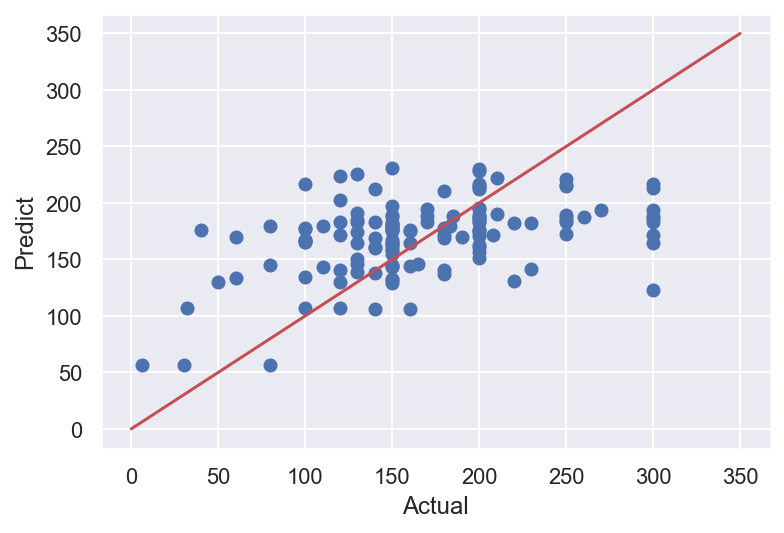

In [187]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,350], [0,350], 'r')


plt.show()

age, working_y, marry_YN_2.0, jung_bi_1.0, univ_grad

기혼이 0, 미혼이 1/ 정규직이 1, 비정규직이 0

In [188]:
test_data = [[30, 5, 0, 1, 1]]
reg = RandomForestRegressor(max_depth=5, n_estimators=1000)
reg.fit(X_train, y_train)
reg.predict(test_data)

array([228.72641246])

In [189]:
test_data = [[38, 10, 1, 1, 1]]
reg = RandomForestRegressor(max_depth=5, n_estimators=1000)
reg.fit(X_train, y_train)
reg.predict(test_data)

array([220.52703881])

In [190]:
test_data = [[21, 1, 1, 0, 0]]
reg = RandomForestRegressor(max_depth=5, n_estimators=1000)
reg.fit(X_train, y_train)
reg.predict(test_data)

array([106.74675407])

## 모든변수 one-hot 인코딩한 파일로 분석

In [31]:
data = pd.read_csv("result_one_hot.csv")
data.head()

case   age  JOBSAL  working_y  fa_job_0.0  fa_job_1.0  fa_job_2.0  \
0   1.0  32.0   180.0         10           0           0           0   
1   4.0  19.0    32.0          1           0           0           1   
2   4.0  19.0   220.0          1           0           0           0   
3   3.0  31.0   200.0          1           0           0           0   
4   1.0  25.0   200.0          2           0           0           0   

   fa_job_3.0  fa_job_4.0  fa_job_5.0  ...  j_type_9.0  j_type_10.0  \
0           0           0           1  ...           0            0   
1           0           0           0  ...           0            0   
2           0           0           0  ...           0            0   
3           0           0           0  ...           0            0   
4           1           0           0  ...           0            0   

   job_pp_0.0  job_pp_1.0  job_pp_2.0  job_pp_3.0  job_pp_4.0  job_pp_5.0  \
0           0           0           0           0           1           0   
1           0           0           1           0           0           0   
2           0           0           0           0           0           1   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   job_pp_6.0  job_pp_7.0  
0           0           0  
1           0           0  
2           0           0  
3           0           1  
4           0           1  

[5 rows x 116 columns]

In [32]:
data.columns

Index(['case', 'age', 'JOBSAL', 'working_y', 'fa_job_0.0', 'fa_job_1.0',
       'fa_job_2.0', 'fa_job_3.0', 'fa_job_4.0', 'fa_job_5.0',
       ...
       'j_type_9.0', 'j_type_10.0', 'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0',
       'job_pp_3.0', 'job_pp_4.0', 'job_pp_5.0', 'job_pp_6.0', 'job_pp_7.0'],
      dtype='object', length=116)

In [65]:
X = data.drop(['JOBSAL', 'fa_job_0.0', 'fa_edu_0.0', 'life_15_1.0', 'fama_rel_15_0.0', 'hschool_0.0',
              'univ_area_0.0', 'univ_mjor_0.0', 'jung_bi_0.0', 'level_0.0', 'j_type_0.0',
               'level_1.0', 'level_2.0', 'level_3.0', 'level_4.0', 'level_5.0', 'j_type_1.0', 'j_type_2.0',
               'j_type_3.0', 'j_type_4.0', 'j_type_5.0', 'j_type_6.0', 'j_type_7.0', 'j_type_8.0', 'j_type_9.0',
               'j_type_10.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0', 'job_pp_5.0', 'job_pp_6.0', 
               'job_pp_7.0', 'job_pp_0.0'], axis=1)
y = data['JOBSAL']

In [ ]:
# 'level_1.0', 'level_2.0', 'level_3.0', 'level_4.0', 'level_5.0', 'j_type_1.0', 'j_type_2.0',
# 'j_type_3.0', 'j_type_4.0', 'j_type_5.0', 'j_type_6.0', 'j_type_7.0', 'j_type_8.0', 'j_type_9.0',
# 'j_type_10.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0', 'job_pp_5.0', 'job_pp_6.0', 'job_pp_7.0'

In [58]:
# X = data.drop(['JOBSAL', 'univ_in_seoul'], axis=1)
# y = data['JOBSAL']

In [66]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [67]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 JOBSAL   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     10.26
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           5.31e-95
Time:                        18:59:33   Log-Likelihood:                -10232.
No. Observations:                1877   AIC:                         2.062e+04
Df Residuals:                    1799   BIC:                         2.105e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
case                6.5940      0.646     

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 13)

In [69]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=3, random_state=13)))
models.append(('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=3, random_state=13)))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor(max_depth=3)))

In [77]:
from sklearn.metrics import accuracy_score, r2_score
import math
print('='*20, '변수 제거 전(모든 범주 포함)', '='*20)
for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    print('--------', name, '-----------')
    print('r-square(train) : ', round(r2_score(y_train, y_pred_tr),2))
    print('r-square(test) : ', round(r2_score(y_test, y_pred_test),2))
    print('rmse(train) : ', round(math.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    print('rmse(test) : ', round(math.sqrt(mean_squared_error(y_test, y_pred_test)),2))

==================== 변수 제거 전(모든 범주 포함) ====================
-------- LinearRegression -----------
r-square(train) :  0.32
r-square(test) :  0.18
rmse(train) :  55.95
rmse(test) :  60.64
-------- DecisionTreeRegressor -----------
r-square(train) :  0.23
r-square(test) :  0.25
rmse(train) :  59.69
rmse(test) :  58.02
-------- RandomForestRegressor -----------
r-square(train) :  0.26
r-square(test) :  0.26
rmse(train) :  58.25
rmse(test) :  57.56
-------- GradientBoostingRegressor -----------
r-square(train) :  0.47
r-square(test) :  0.26
rmse(train) :  49.44
rmse(test) :  57.37
-------- XGBRegressor -----------
r-square(train) :  0.6
r-square(test) :  0.22
rmse(train) :  42.82
rmse(test) :  59.13


## onehot encoding하지 않은 데이터로 분석

In [41]:
data1 = pd.read_csv(".data/result_basic.csv")

In [42]:
data1

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
0      1.0     5.0     4.0      3.0          2.0  32.0  6.0       1.0   
1      4.0     2.0     6.0      3.0          4.0  19.0  5.0       2.0   
2      4.0     7.0     3.0      3.0          3.0  19.0  4.0       2.0   
3      3.0     7.0     4.0      3.0          3.0  31.0  7.0       2.0   
4      1.0     3.0     5.0      3.0          2.0  25.0  7.0       2.0   
...    ...     ...     ...      ...          ...   ...  ...       ...   
1872   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
1873   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
1874   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
1875   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
1876   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  univ_area  jung_bi  level  j_type  job_pp  JOBSAL  \
0         1.0        7.0       15.0      1.0    1.0     1.0     4.0   180.0   
1         1.0        0.0        0.0      2.0    1.0     2.0     2.0    32.0   
2         3.0        0.0        0.0      1.0    1.0     1.0     5.0   220.0   
3         2.0        9.0        1.0      1.0    1.0     1.0     7.0   200.0   
4         1.0        3.0        2.0      1.0    1.0     1.0     7.0   200.0   
...       ...        ...        ...      ...    ...     ...     ...     ...   
1872      1.0        6.0        6.0      1.0    0.0     1.0     2.0   200.0   
1873      1.0       10.0        6.0      1.0    0.0     1.0     5.0   250.0   
1874      3.0        0.0        0.0      1.0    0.0     1.0     2.0   200.0   
1875      3.0        0.0        0.0      2.0    0.0     1.0     1.0    60.0   
1876      1.0       12.0        2.0      1.0    0.0     9.0     3.0   250.0   

      working_y  
0            10  
1             1  
2             1  
3             1  
4             2  
...         ...  
1872          2  
1873          3  
1874          5  
1875          6  
1876          3  

[1877 rows x 17 columns]

In [43]:
data1.drop(data1[data1["case"]==1].index, inplace=True)

In [44]:
data1

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
1      4.0     2.0     6.0      3.0          4.0  19.0  5.0       2.0   
2      4.0     7.0     3.0      3.0          3.0  19.0  4.0       2.0   
3      3.0     7.0     4.0      3.0          3.0  31.0  7.0       2.0   
5      3.0    12.0     1.0      5.0          6.0  27.0  4.0       2.0   
6      3.0     8.0     4.0      3.0          3.0  25.0  6.0       2.0   
...    ...     ...     ...      ...          ...   ...  ...       ...   
1872   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
1873   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
1874   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
1875   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
1876   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  univ_area  jung_bi  level  j_type  job_pp  JOBSAL  \
1         1.0        0.0        0.0      2.0    1.0     2.0     2.0    32.0   
2         3.0        0.0        0.0      1.0    1.0     1.0     5.0   220.0   
3         2.0        9.0        1.0      1.0    1.0     1.0     7.0   200.0   
5         3.0        0.0        0.0      2.0    1.0     1.0     2.0   150.0   
6         3.0        6.0        1.0      2.0    1.0     1.0     2.0   150.0   
...       ...        ...        ...      ...    ...     ...     ...     ...   
1872      1.0        6.0        6.0      1.0    0.0     1.0     2.0   200.0   
1873      1.0       10.0        6.0      1.0    0.0     1.0     5.0   250.0   
1874      3.0        0.0        0.0      1.0    0.0     1.0     2.0   200.0   
1875      3.0        0.0        0.0      2.0    0.0     1.0     1.0    60.0   
1876      1.0       12.0        2.0      1.0    0.0     9.0     3.0   250.0   

      working_y  
1             1  
2             1  
3             1  
5             5  
6             2  
...         ...  
1872          2  
1873          3  
1874          5  
1875          6  
1876          3  

[744 rows x 17 columns]

In [69]:
X = data1.drop(['JOBSAL', 'fa_job','life_15', 'fama_rel_15', 'hschool', 'univ_mjor'], axis=1)
y = data1["JOBSAL"]

In [60]:
data1.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'JOBSAL', 'working_y'],
      dtype='object')

In [70]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [71]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              674.8
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                        0.00
Time:                        13:42:32   Log-Likelihood:                         -4024.7
No. Observations:                 744   AIC:                                      8071.
Df Residuals:                     733   BIC:                                      8122.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 13)

In [62]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=3, random_state=13)))
models.append(('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=3)))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor(max_depth=2)))

In [73]:
from sklearn.metrics import accuracy_score, r2_score
import math

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    print('--------', name, '-----------')
    print('r-square(train) : ', round(r2_score(y_train, y_pred_tr),2))
    print('r-square(test) : ', round(r2_score(y_test, y_pred_test),2))
    print('rmse(train) : ', round(math.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    print('rmse(test) : ', round(math.sqrt(mean_squared_error(y_test, y_pred_test)),2))

-------- LinearRegression -----------
r-square(train) :  0.28
r-square(test) :  0.21
rmse(train) :  53.43
rmse(test) :  55.62
-------- DecisionTreeRegressor -----------
r-square(train) :  0.29
r-square(test) :  0.15
rmse(train) :  53.25
rmse(test) :  57.68
-------- RandomForestRegressor -----------
r-square(train) :  0.33
r-square(test) :  0.22
rmse(train) :  51.74
rmse(test) :  55.38
-------- GradientBoostingRegressor -----------
r-square(train) :  0.56
r-square(test) :  0.22
rmse(train) :  41.78
rmse(test) :  55.31
-------- XGBRegressor -----------
r-square(train) :  0.53
r-square(test) :  0.2
rmse(train) :  43.2
rmse(test) :  55.9


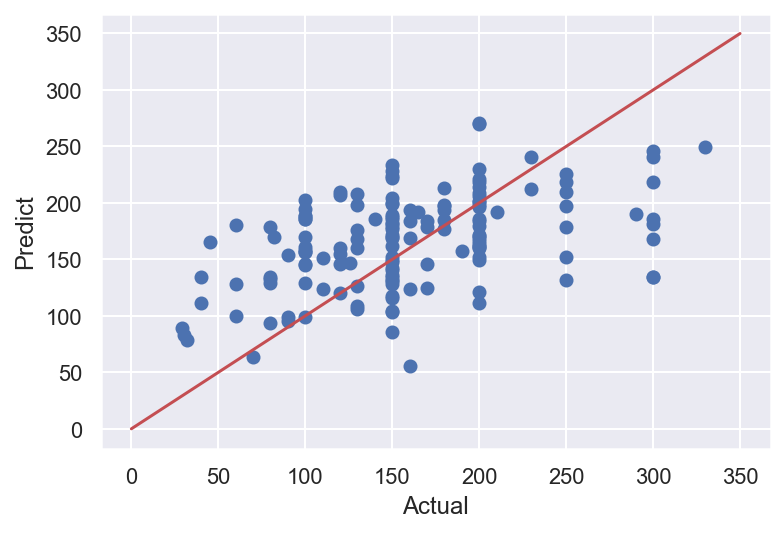

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,350], [0,350], 'r')
plt.show()